In [1]:
# Libraries required
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Change path to the files
pwd = 'TGA/'
os.chdir(pwd)

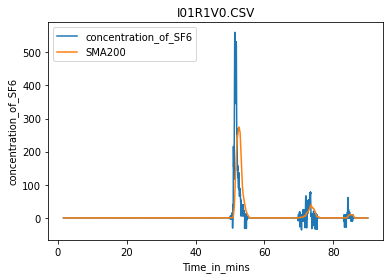

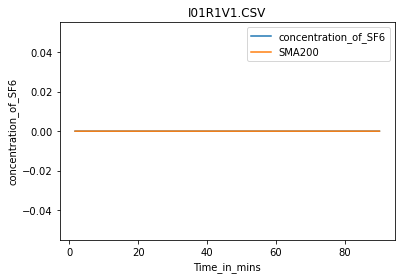

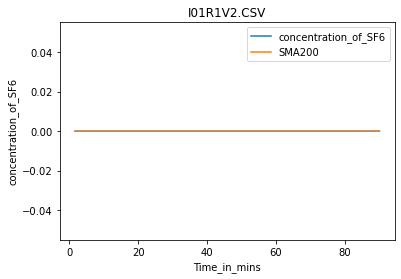

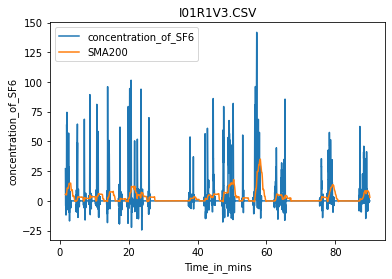

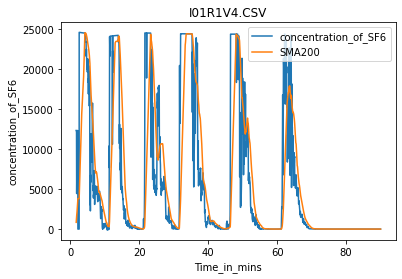

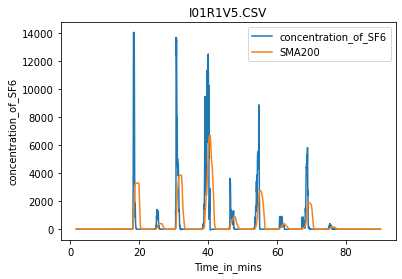

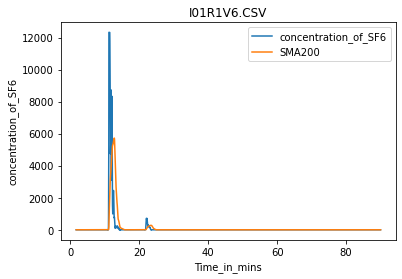

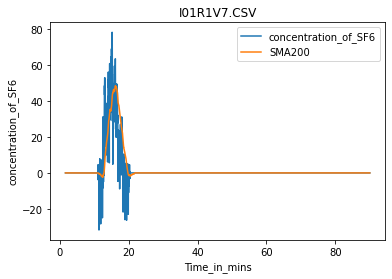

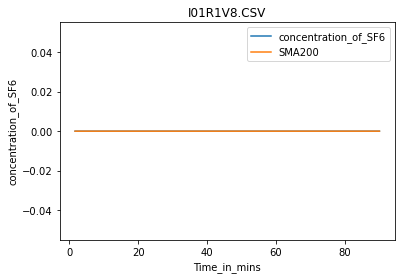

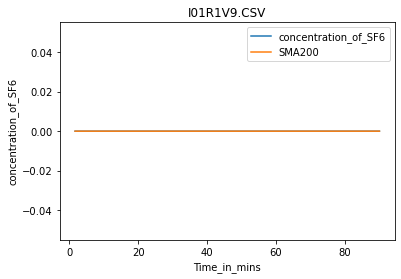

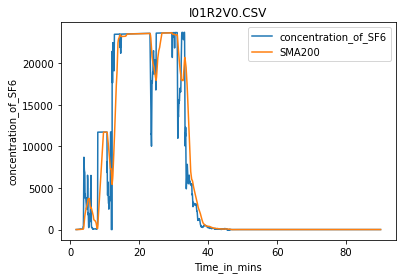

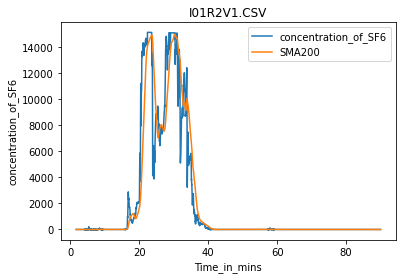

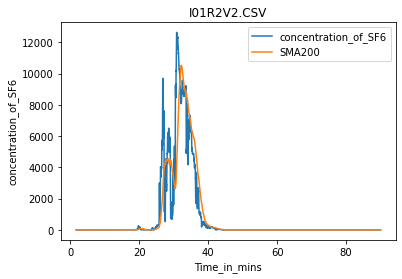

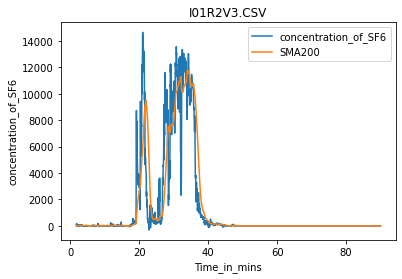

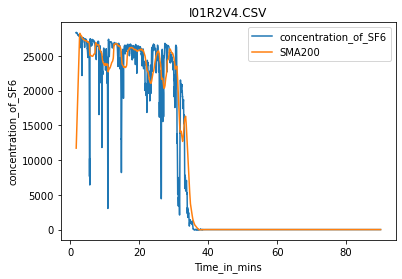

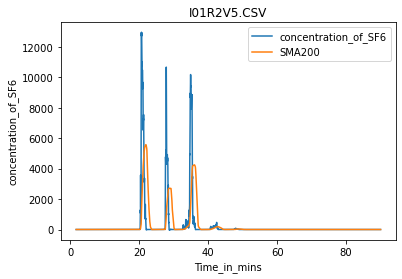

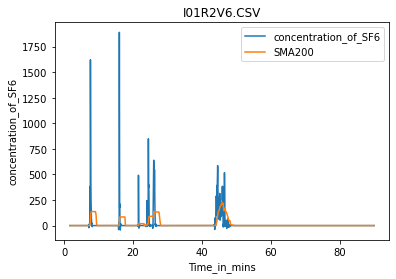

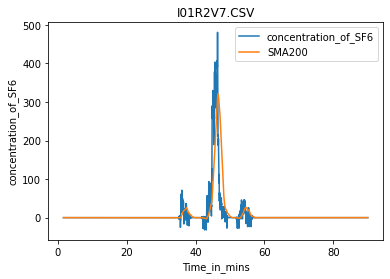

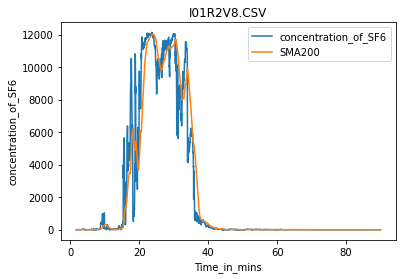

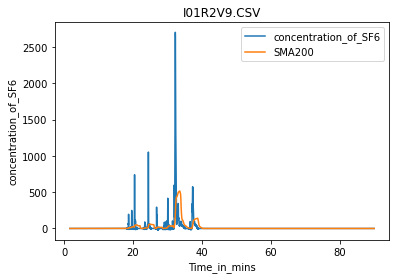

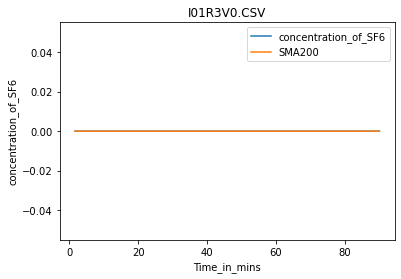

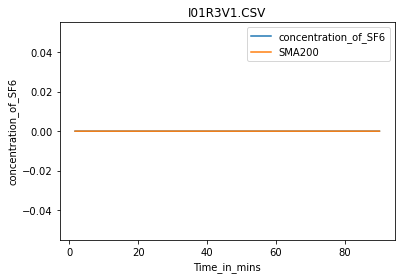

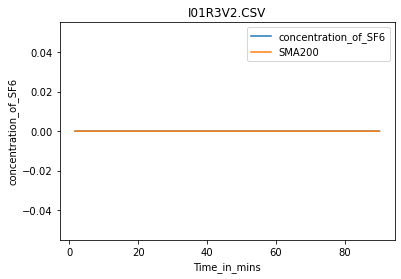

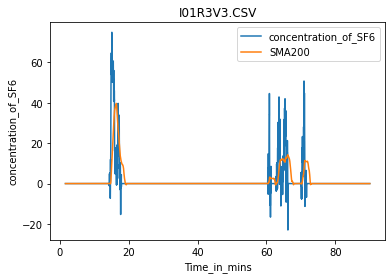

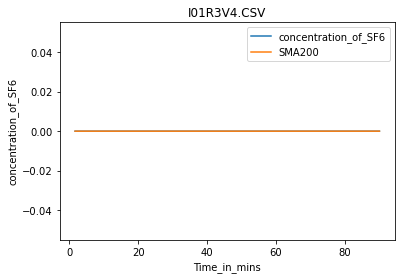

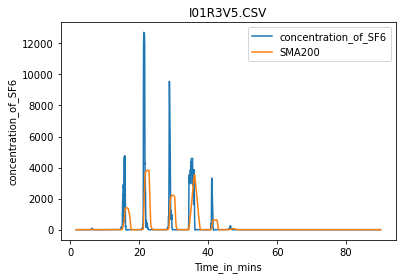

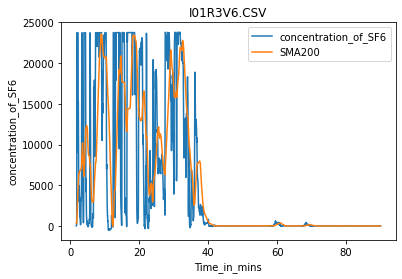

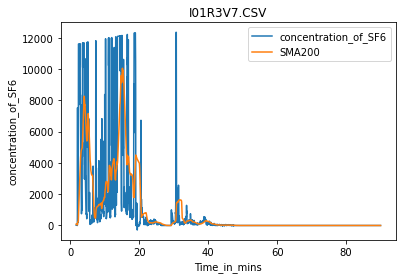

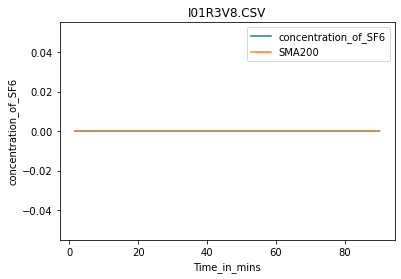

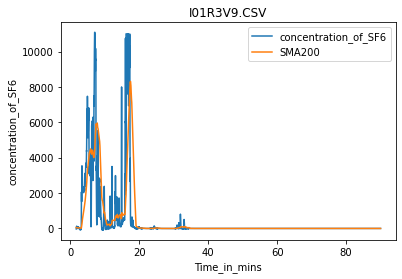

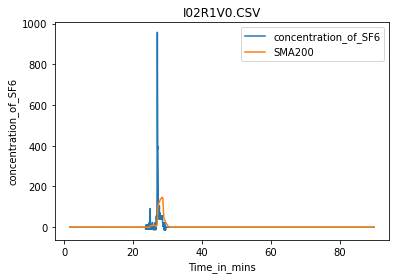

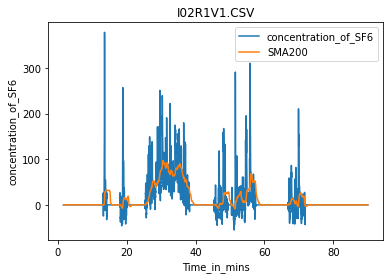

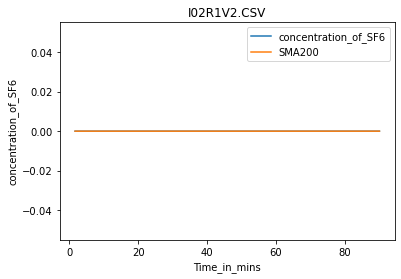

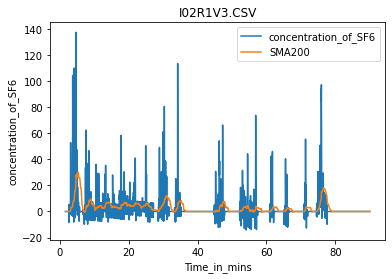

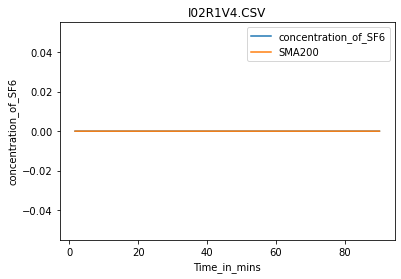

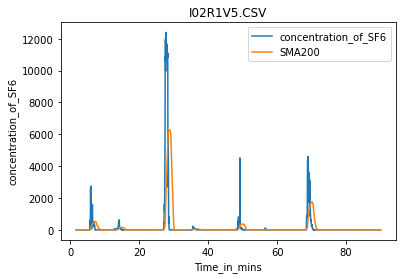

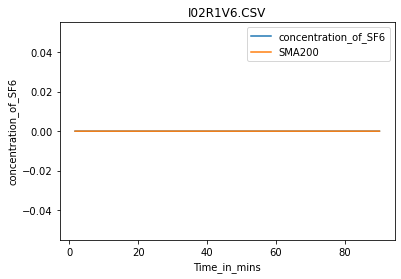

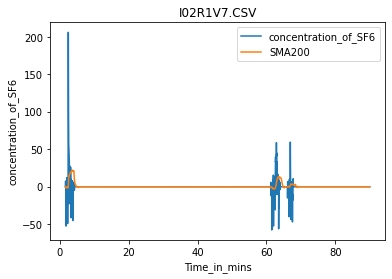

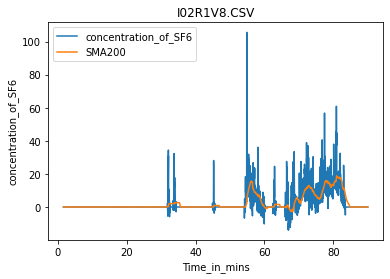

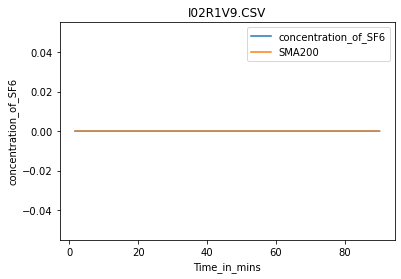

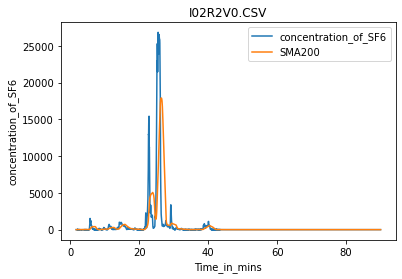

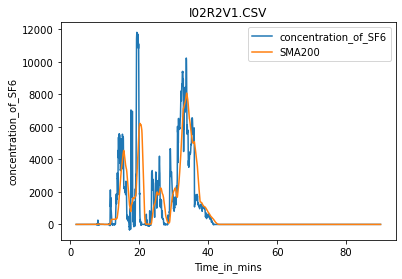

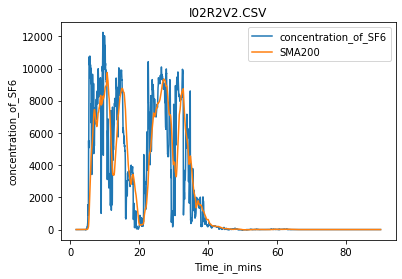

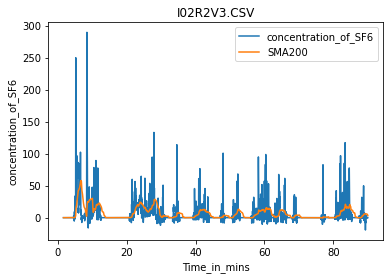

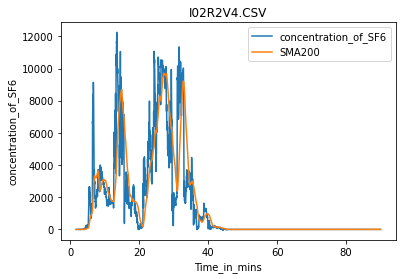

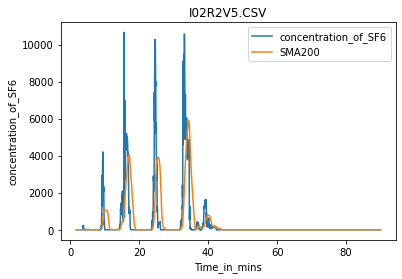

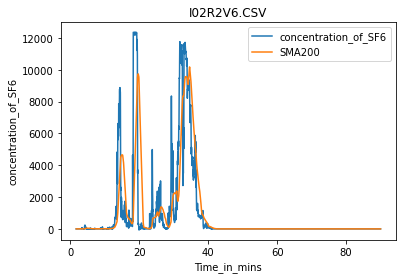

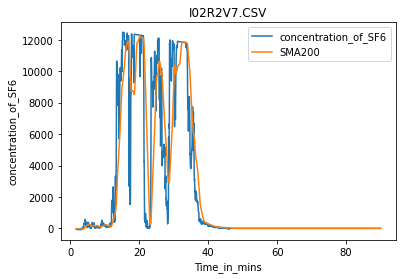

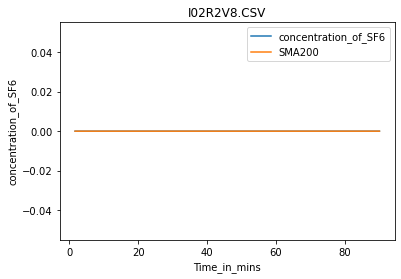

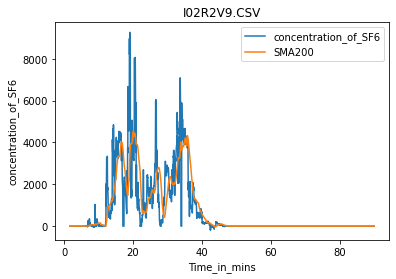

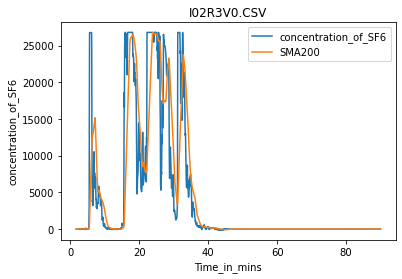

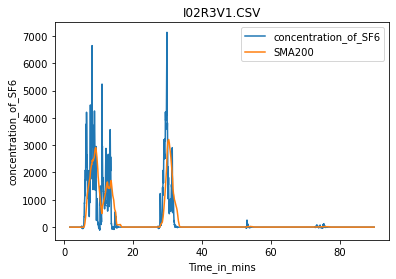

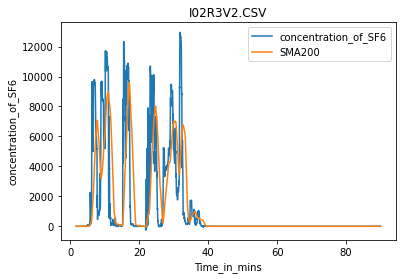

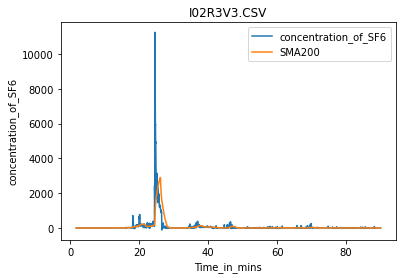

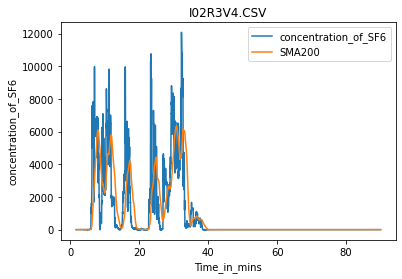

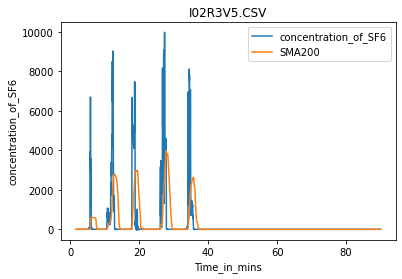

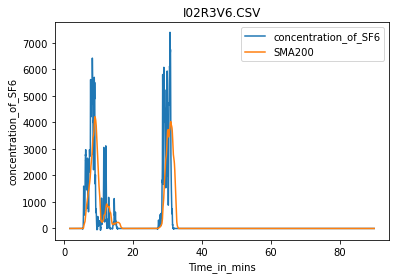

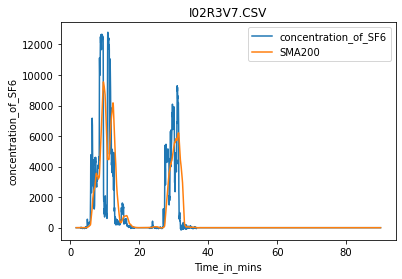

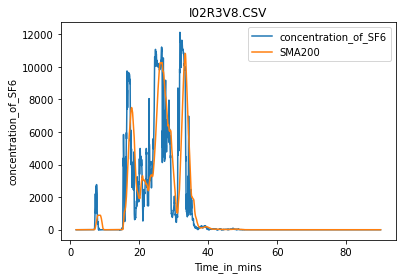

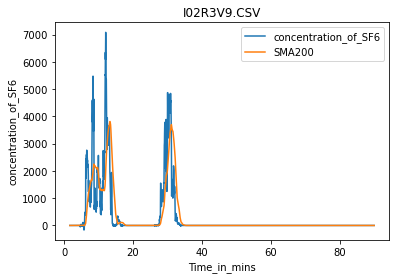

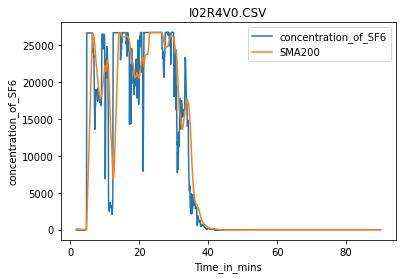

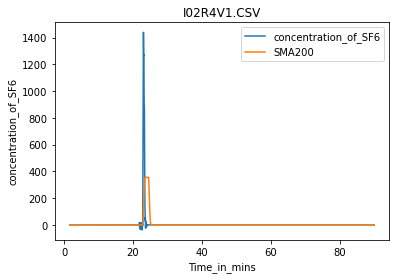

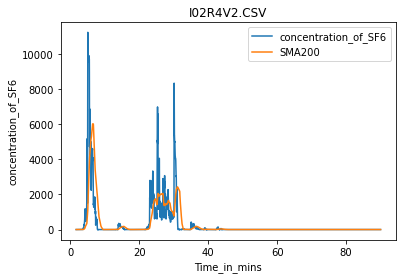

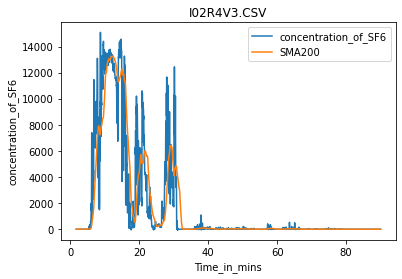

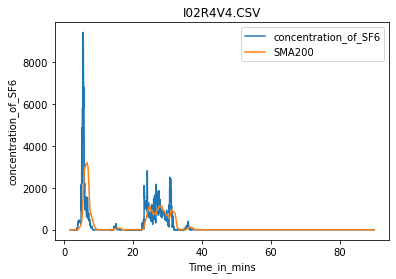

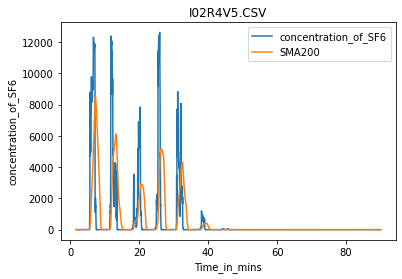

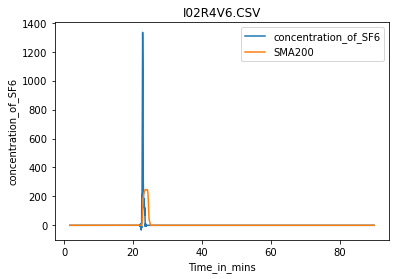

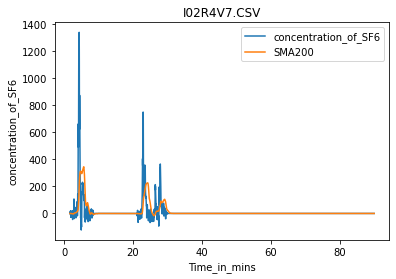

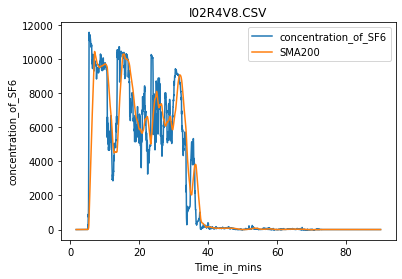

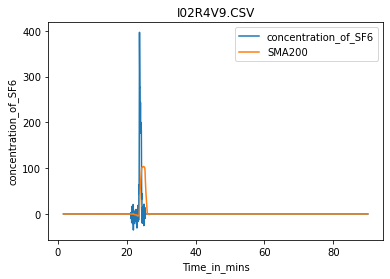

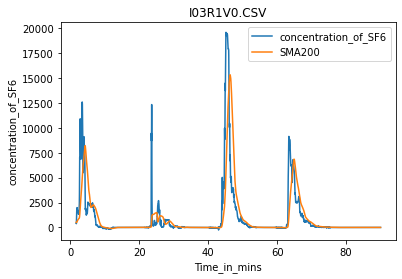

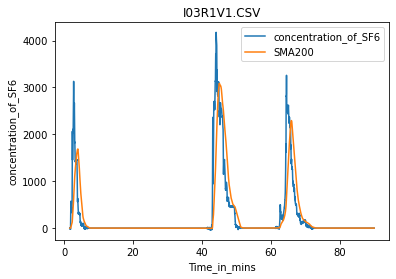

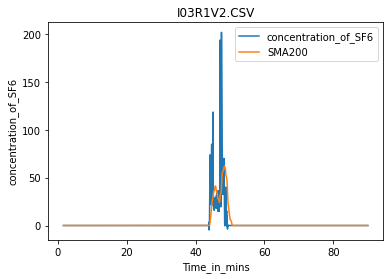

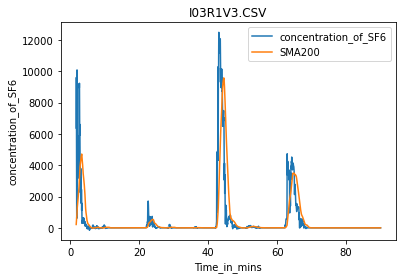

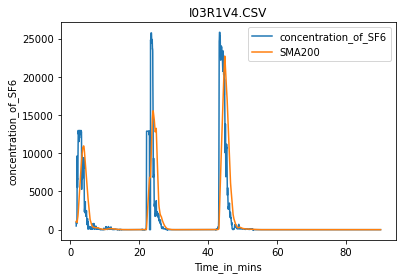

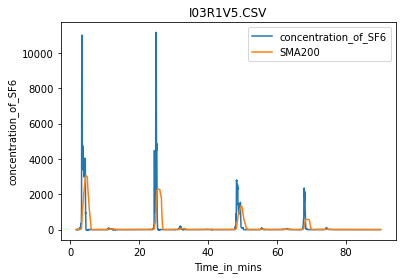

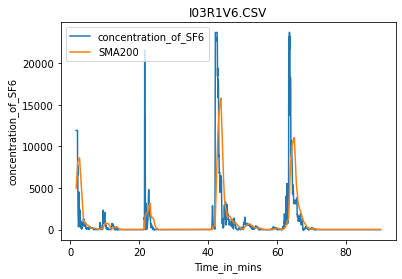

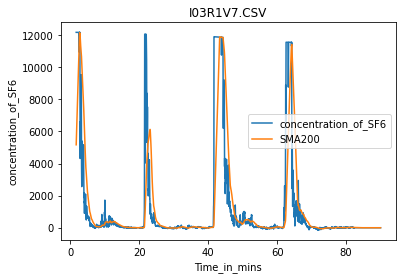

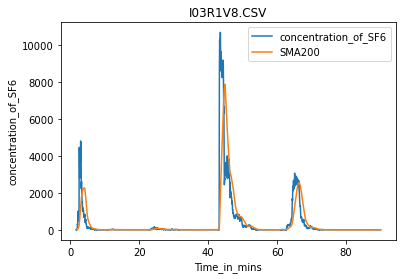

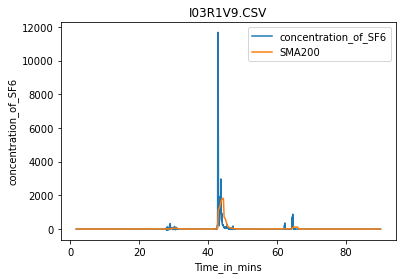

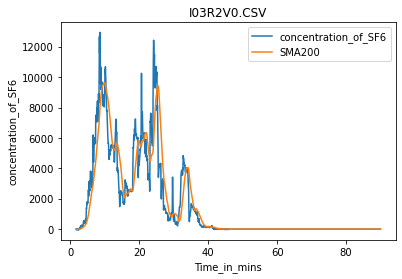

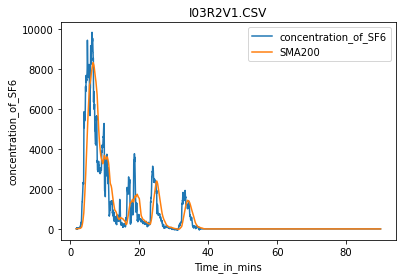

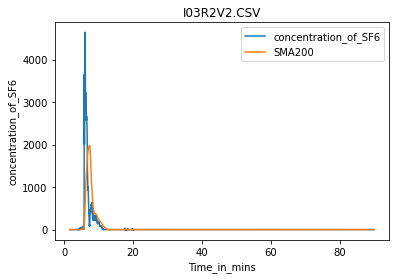

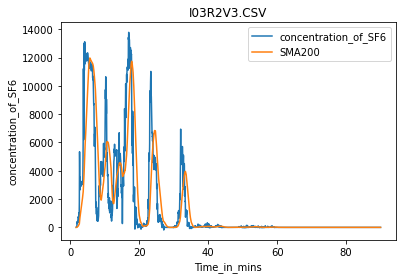

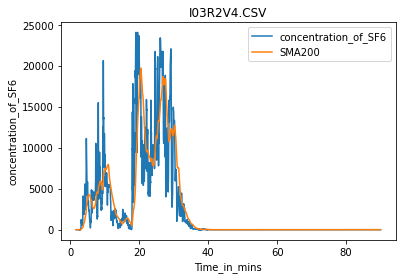

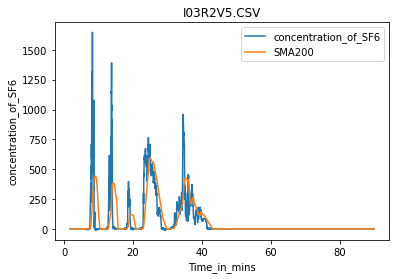

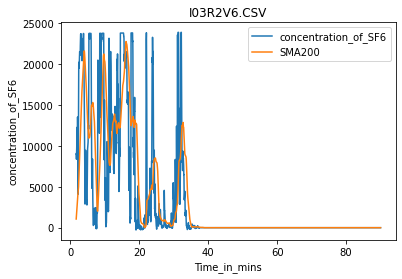

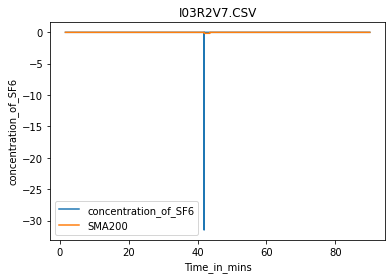

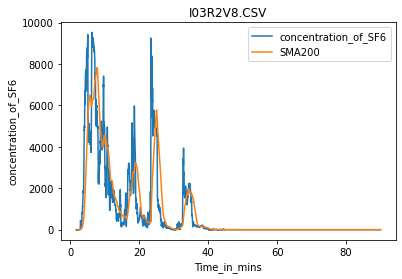

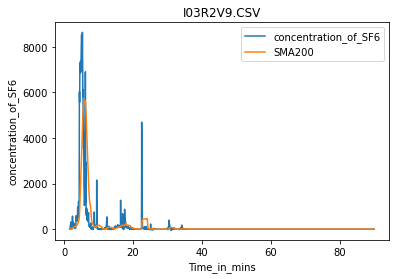

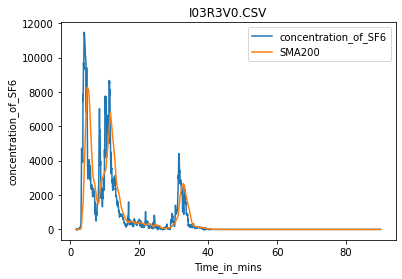

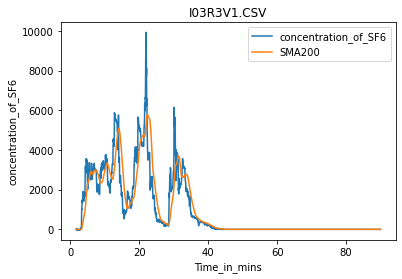

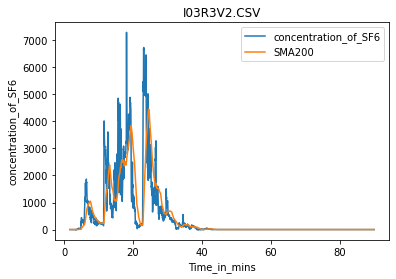

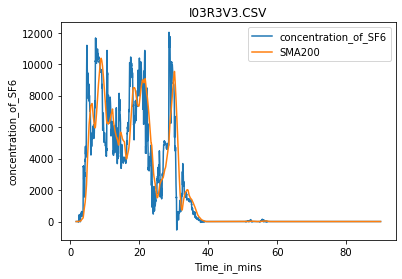

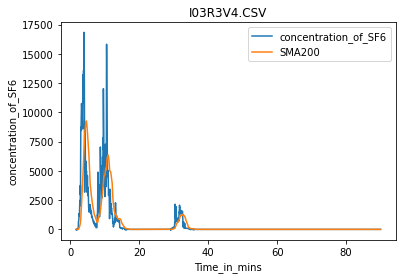

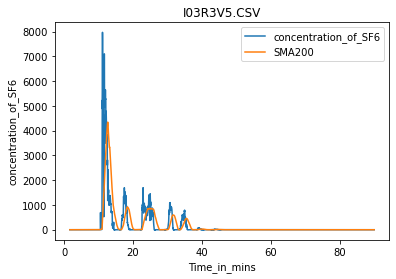

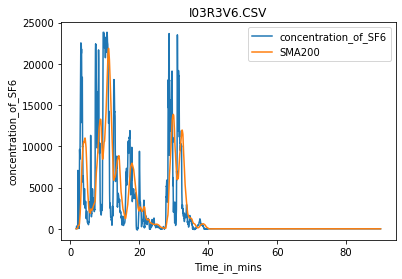

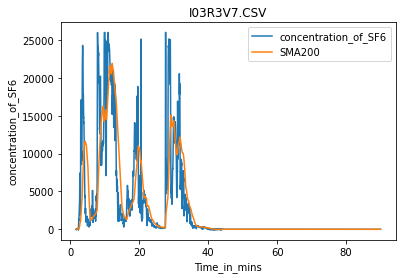

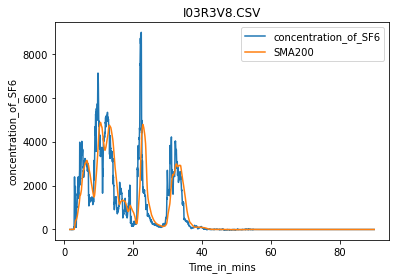

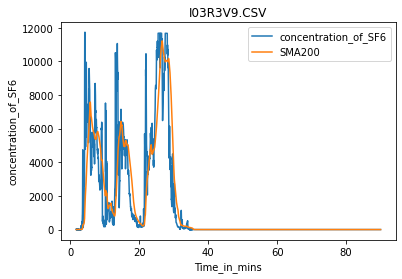

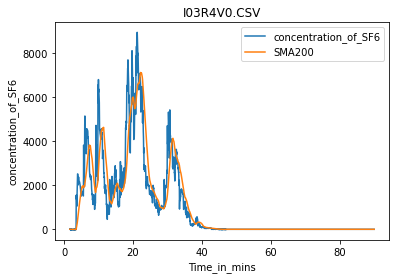

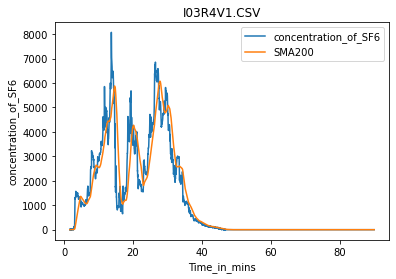

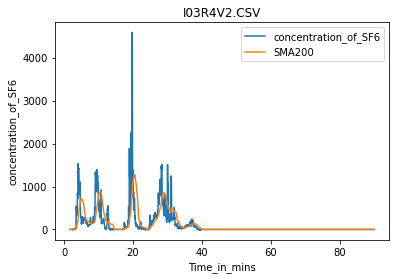

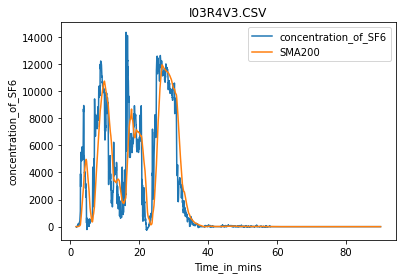

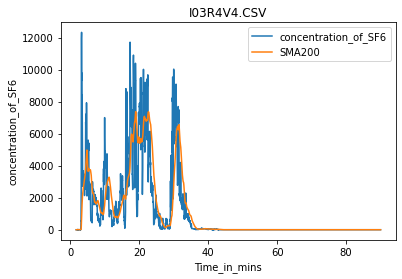

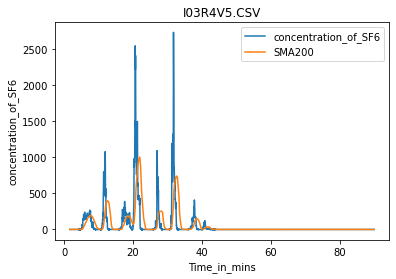

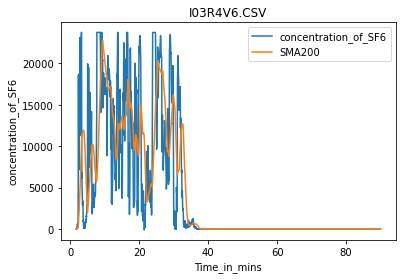

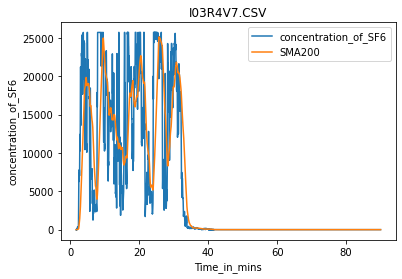

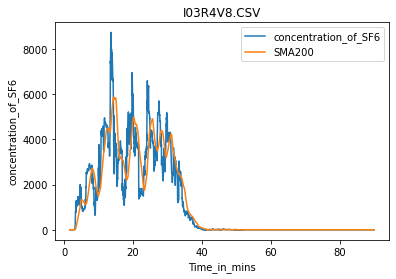

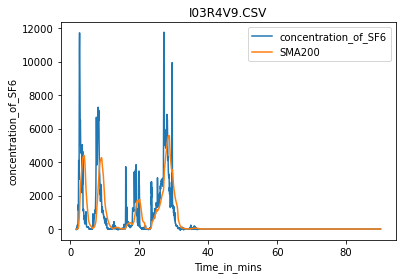

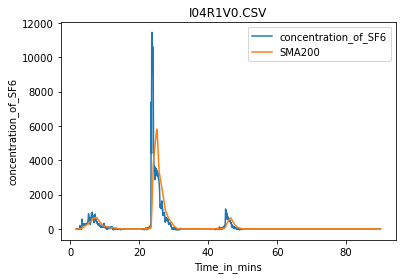

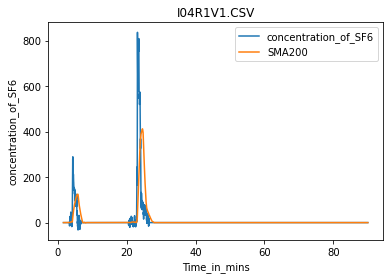

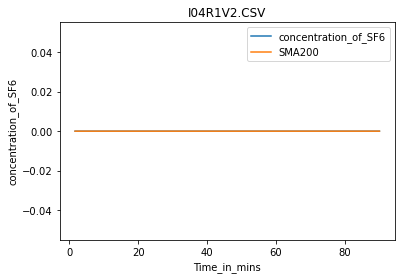

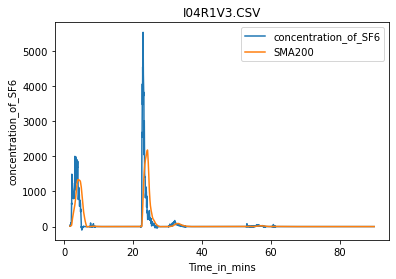

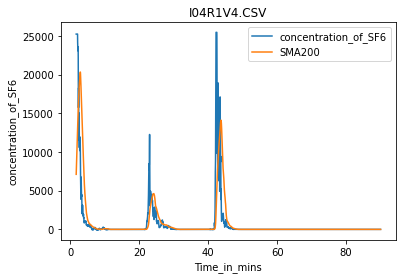

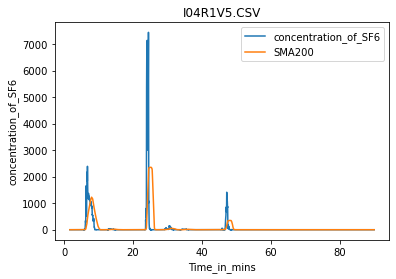

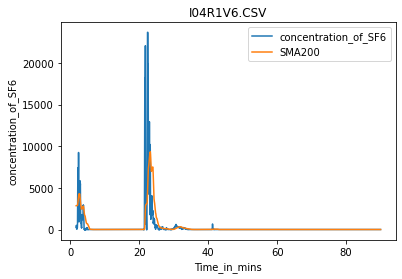

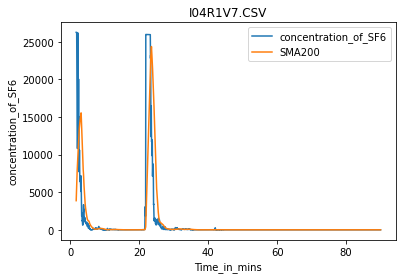

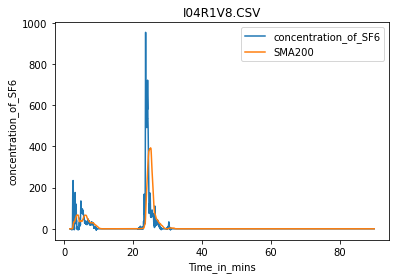

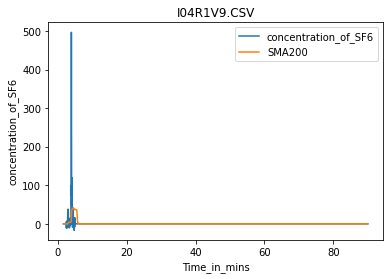

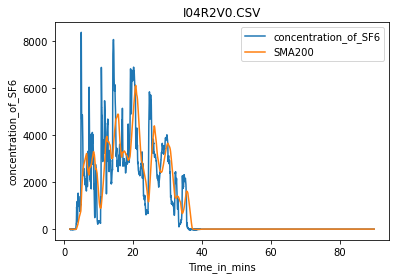

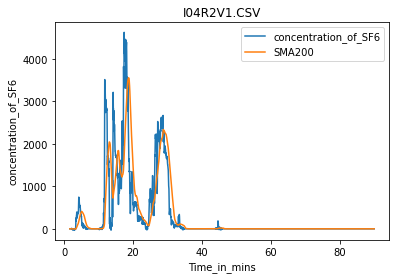

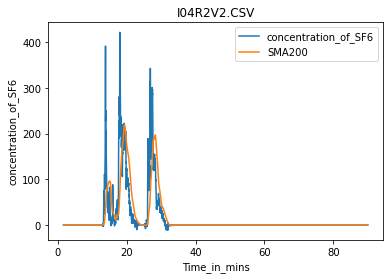

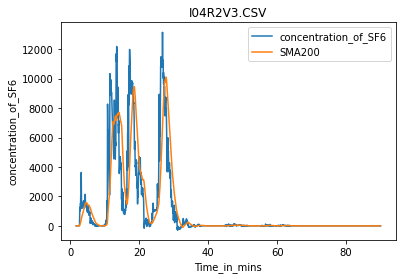

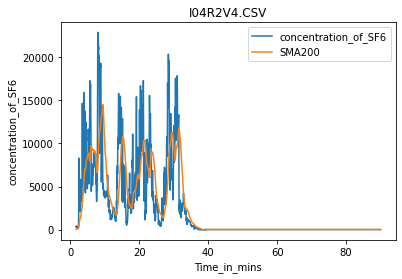

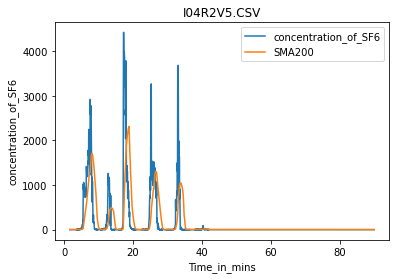

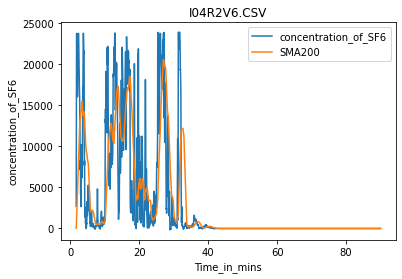

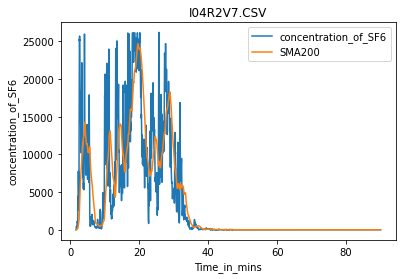

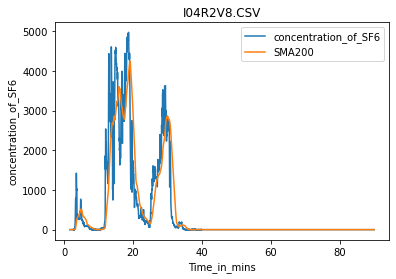

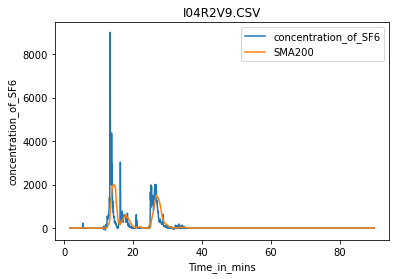

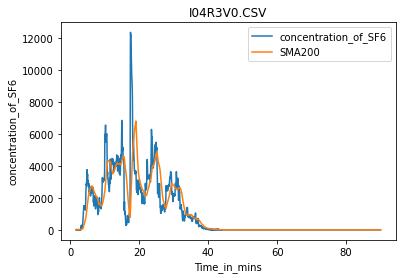

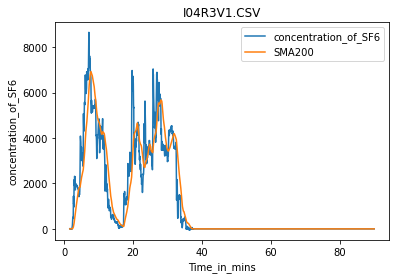

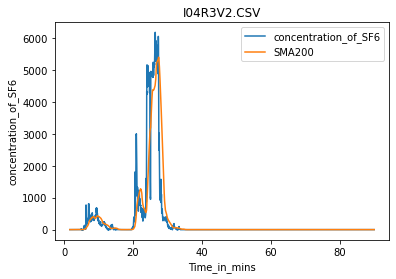

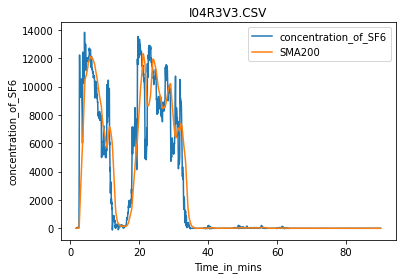

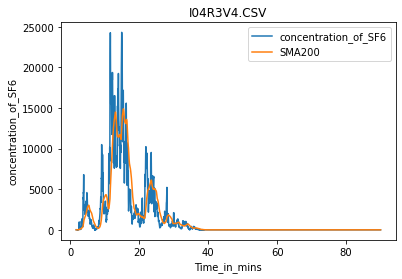

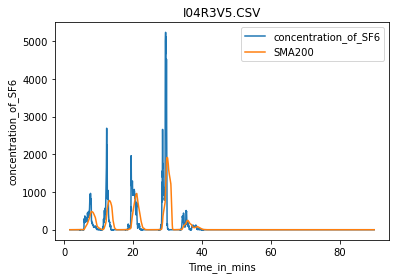

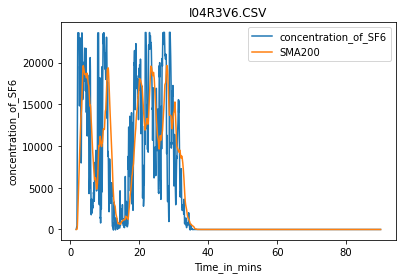

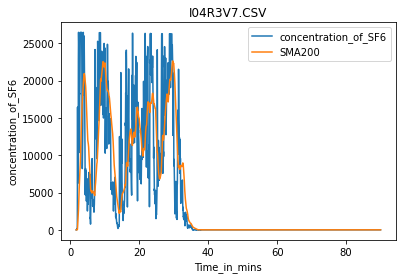

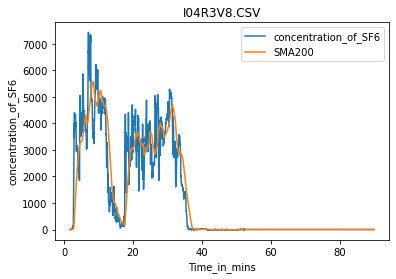

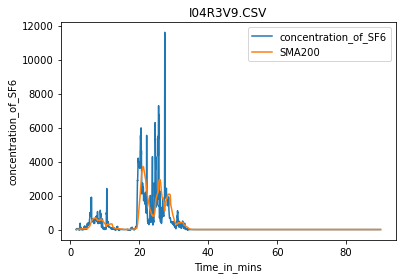

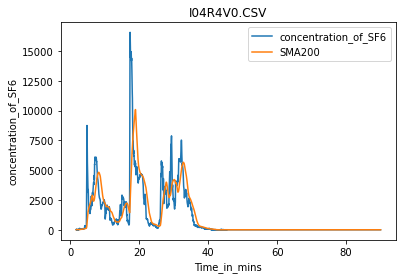

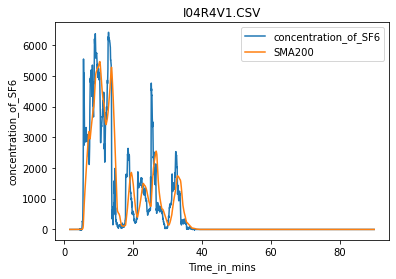

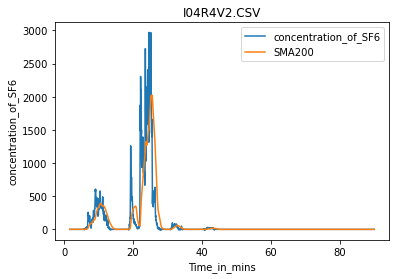

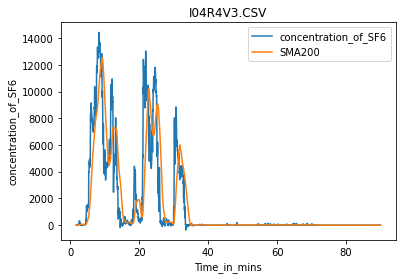

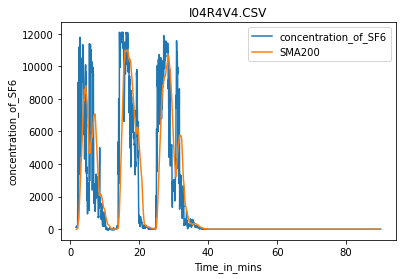

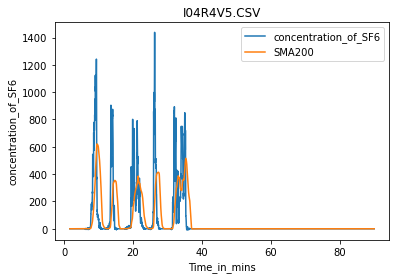

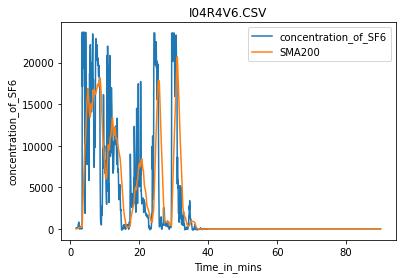

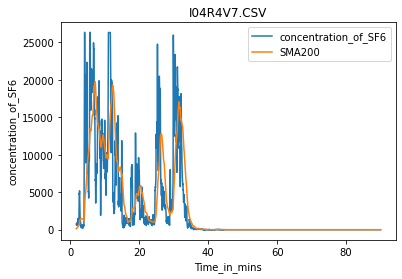

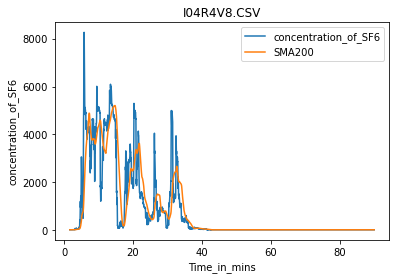

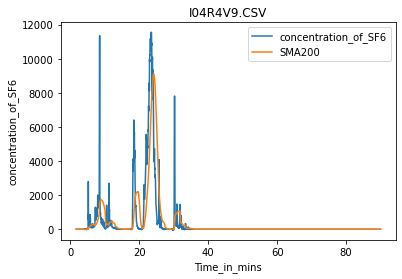

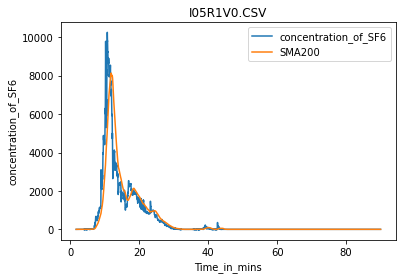

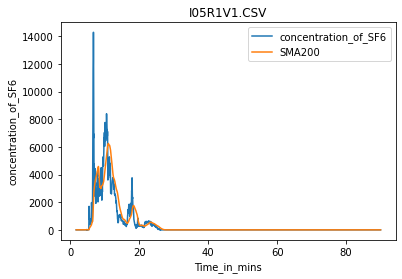

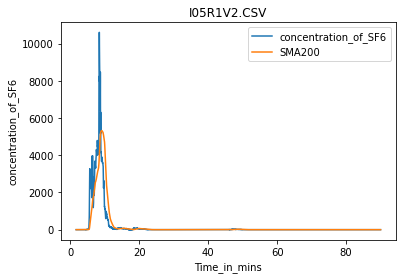

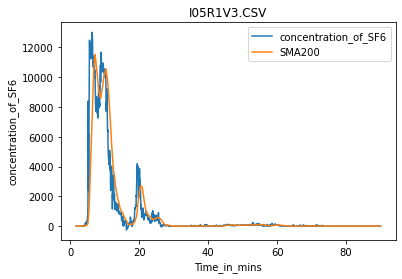

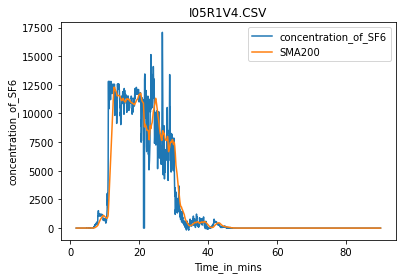

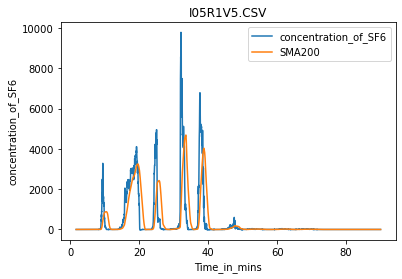

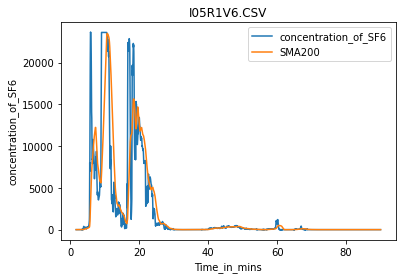

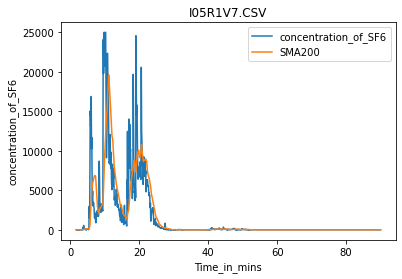

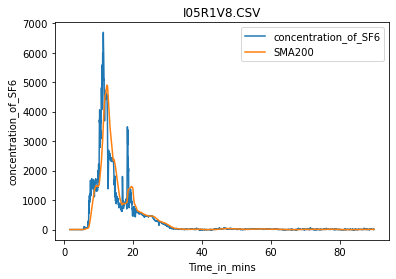

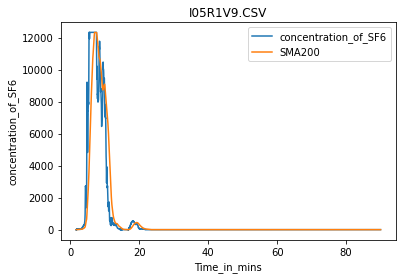

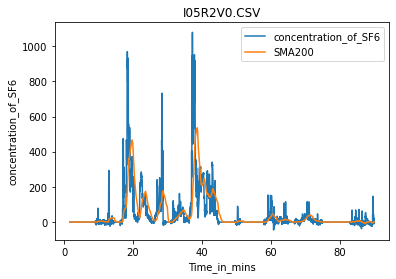

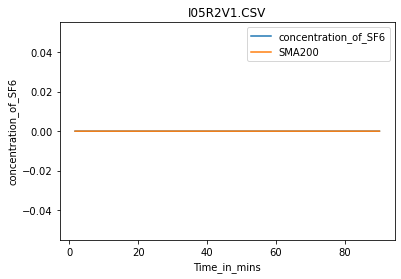

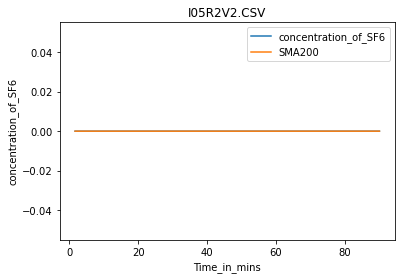

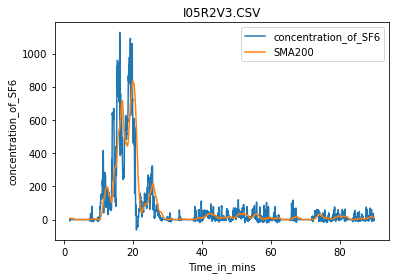

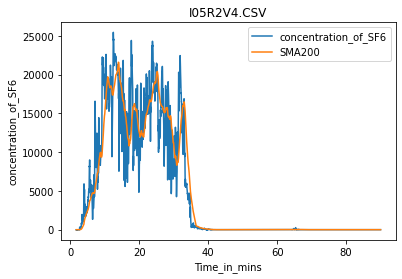

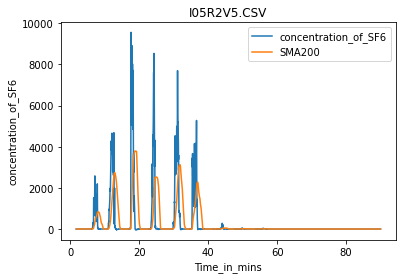

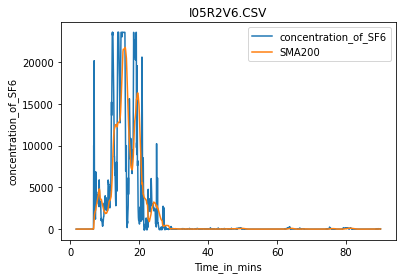

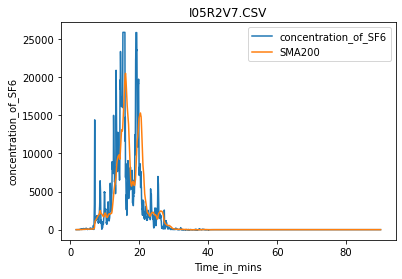

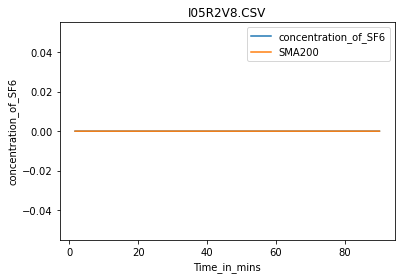

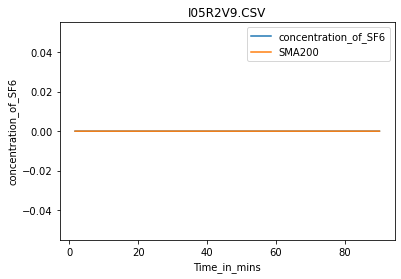

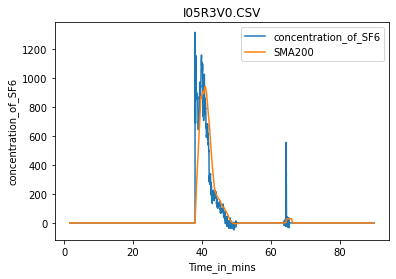

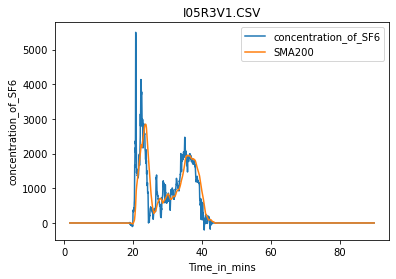

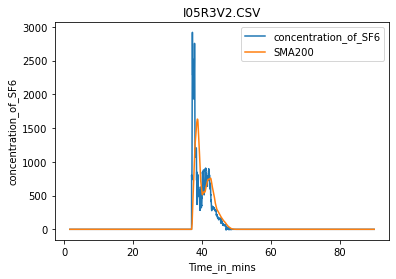

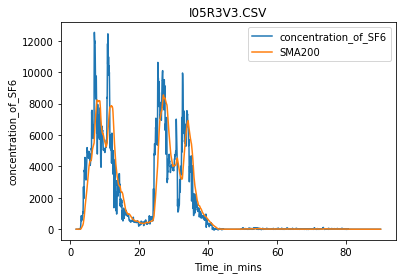

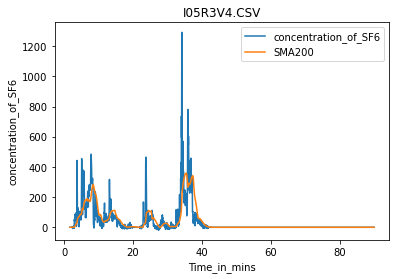

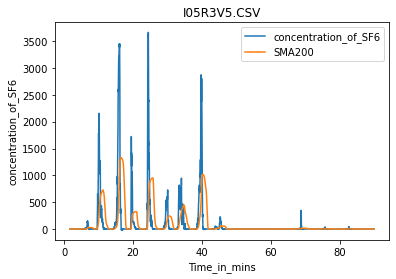

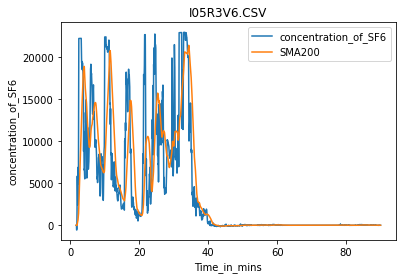

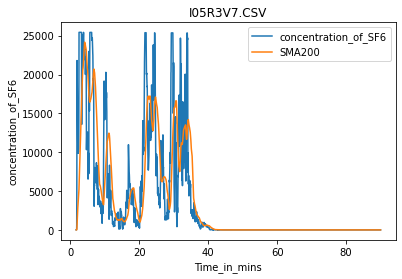

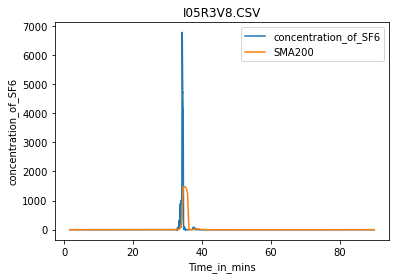

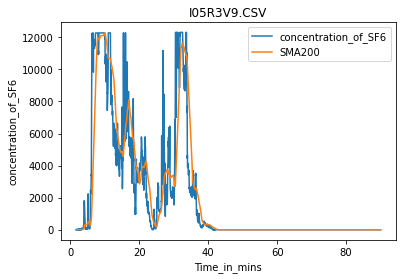

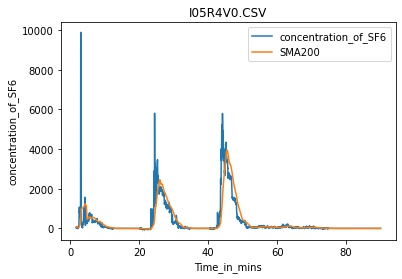

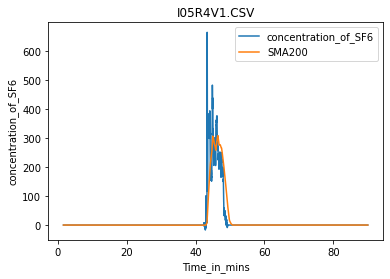

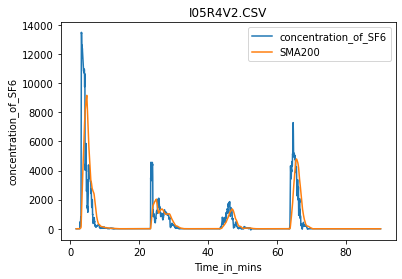

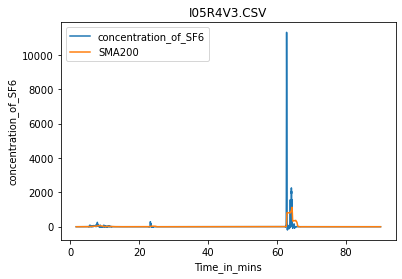

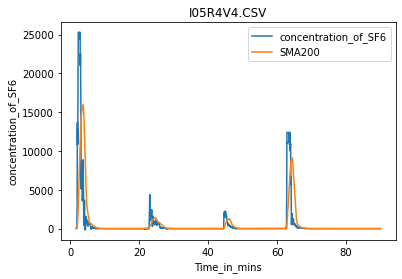

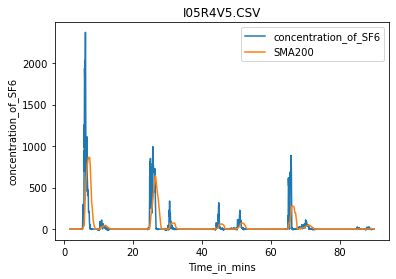

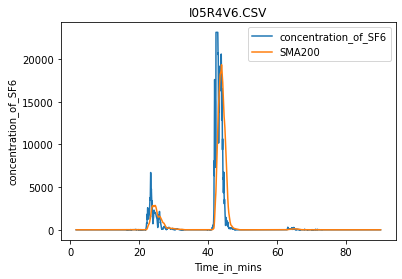

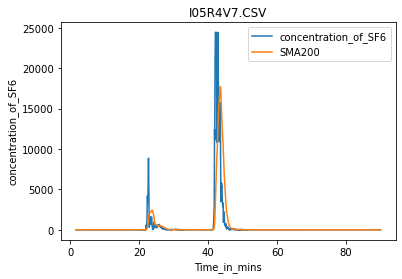

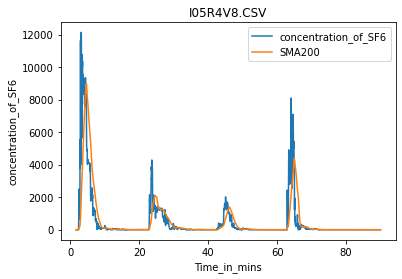

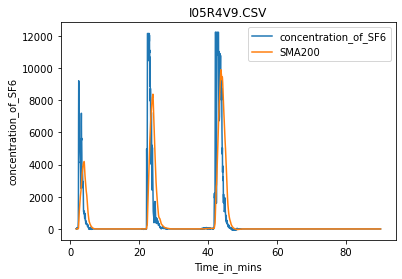

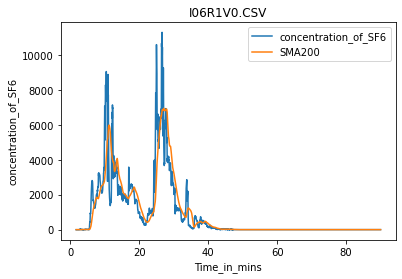

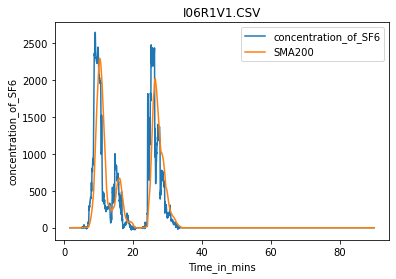

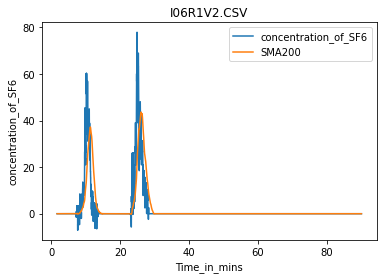

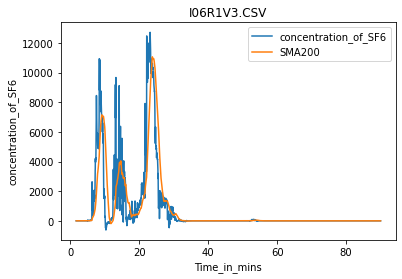

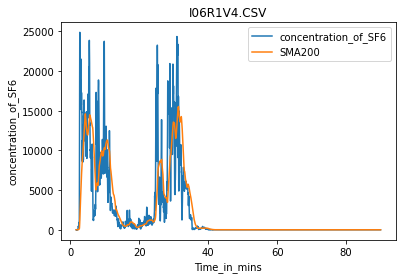

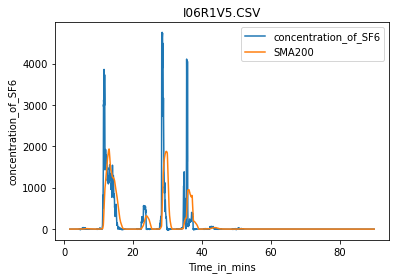

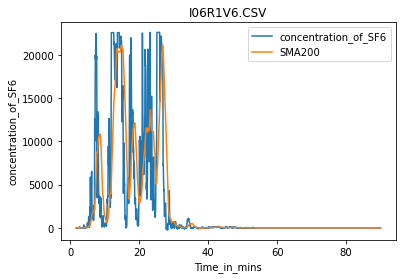

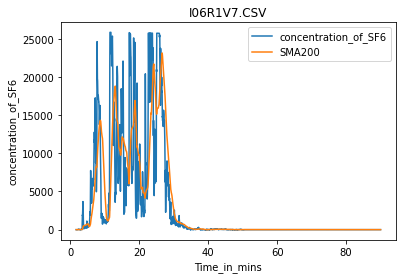

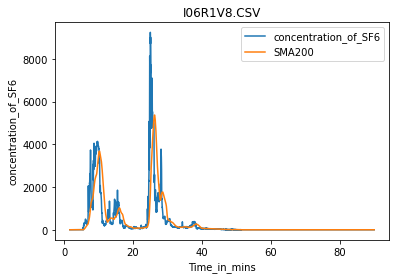

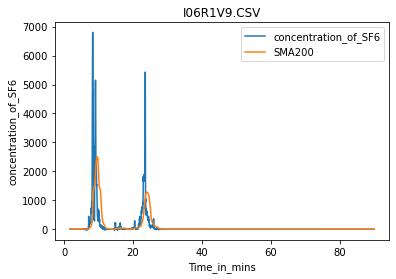

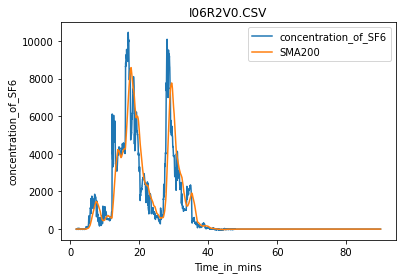

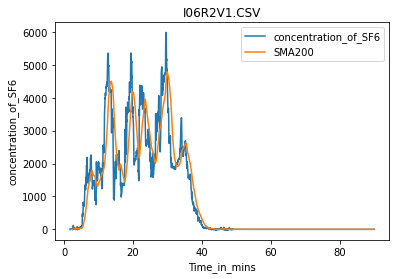

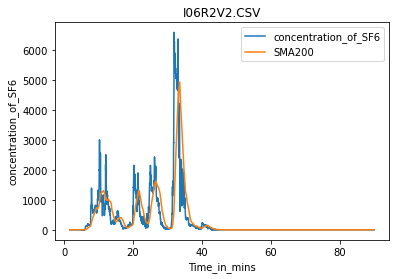

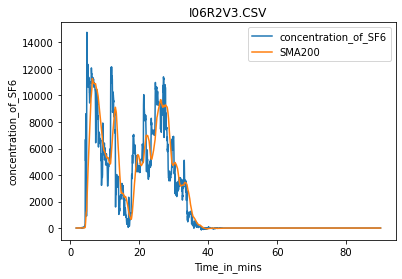

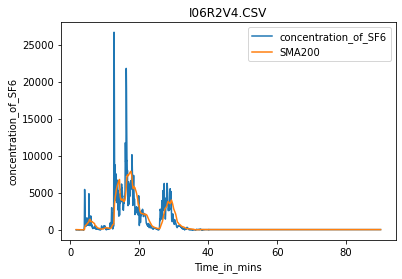

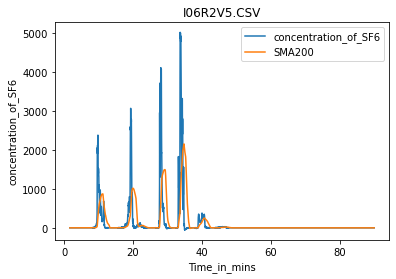

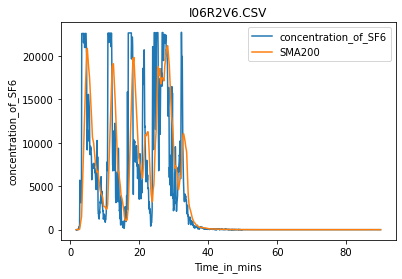

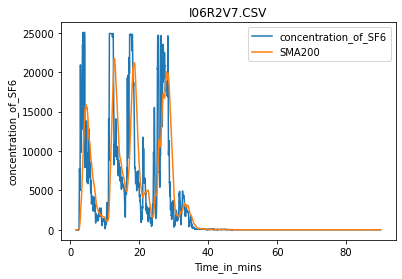

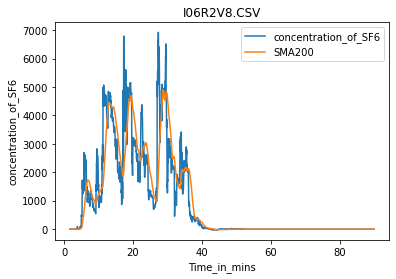

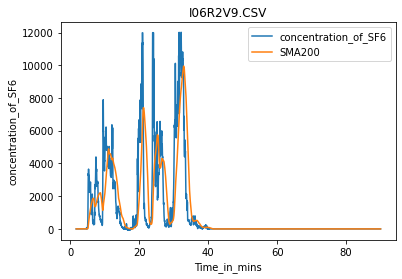

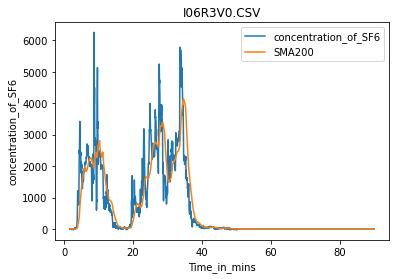

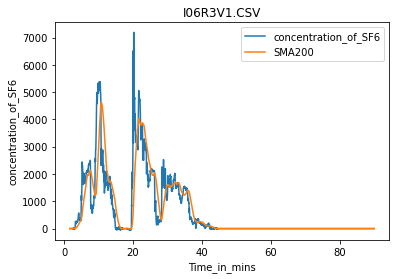

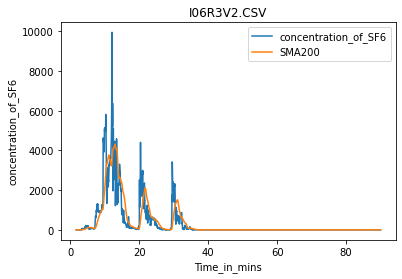

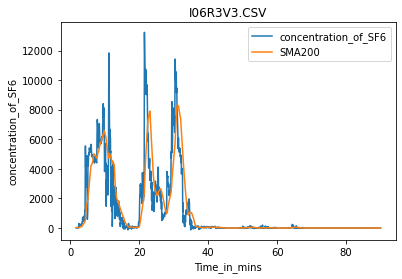

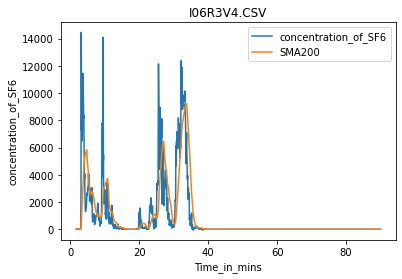

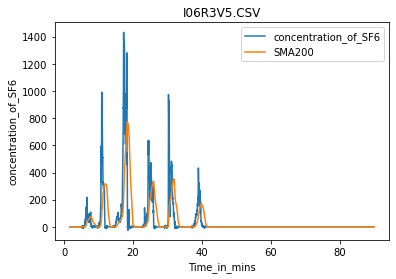

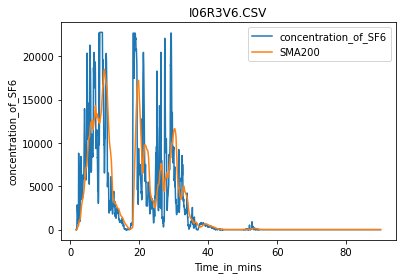

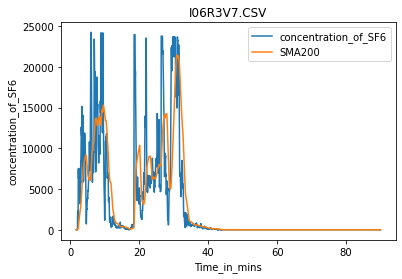

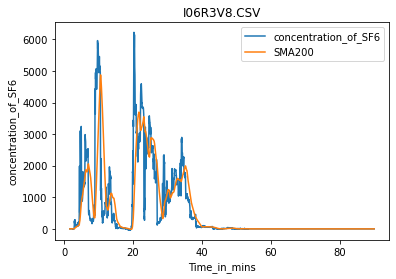

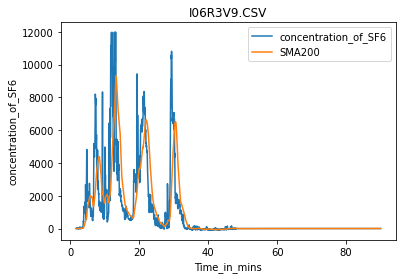

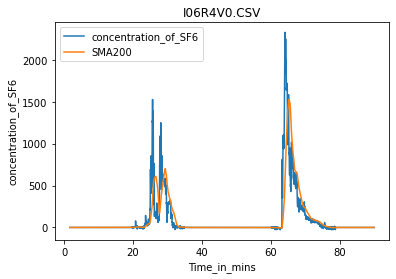

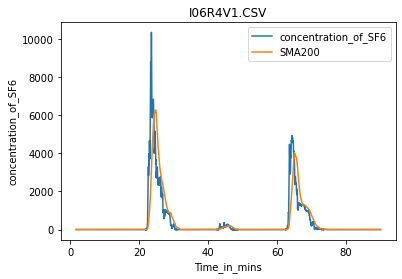

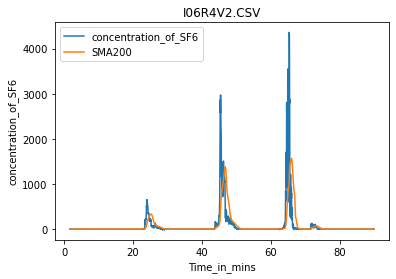

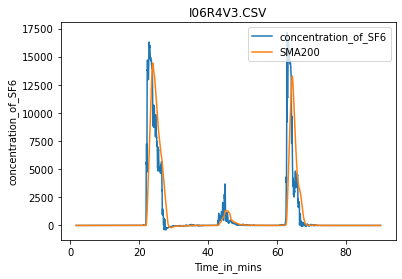

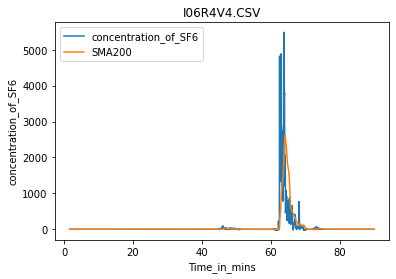

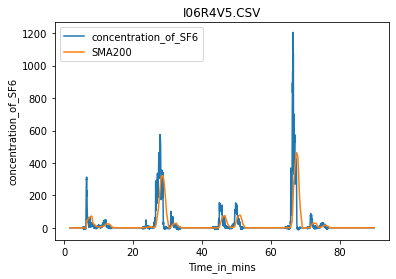

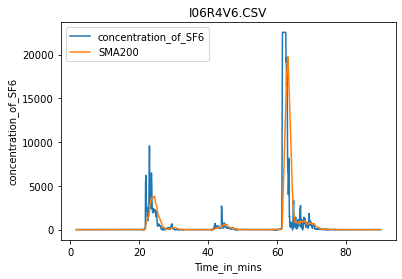

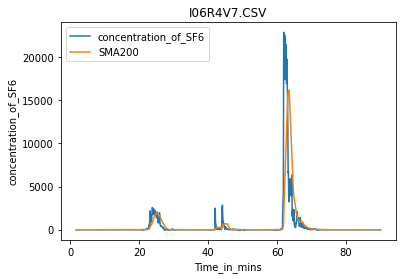

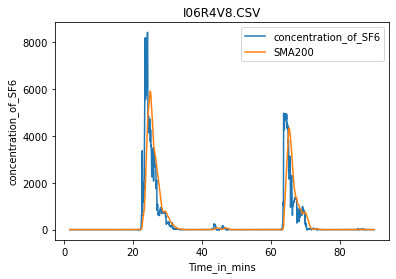

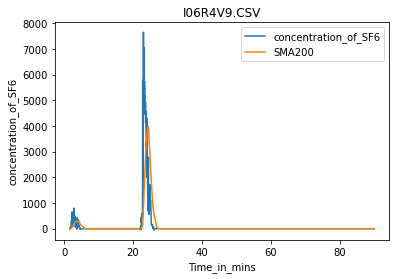

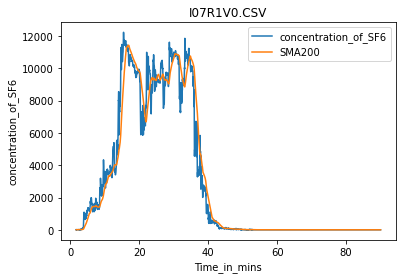

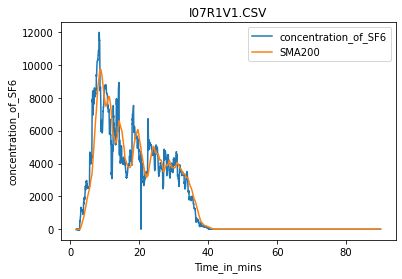

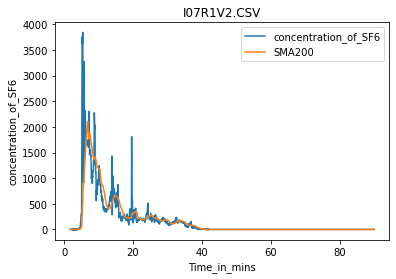

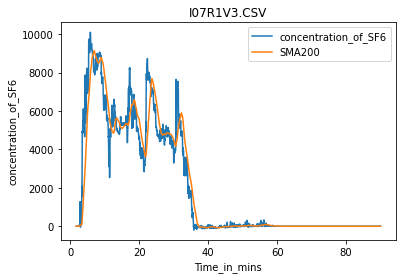

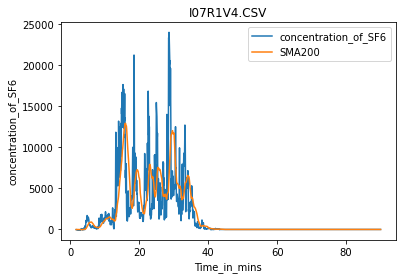

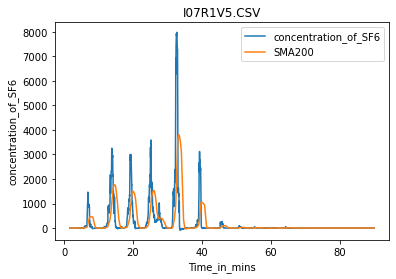

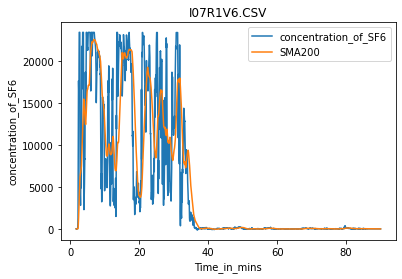

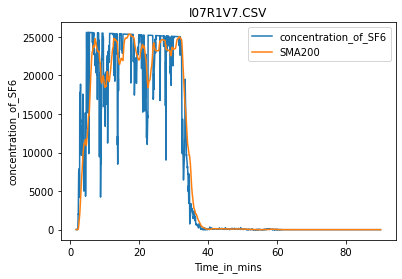

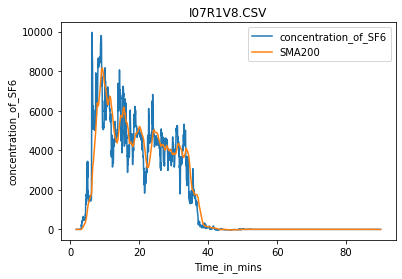

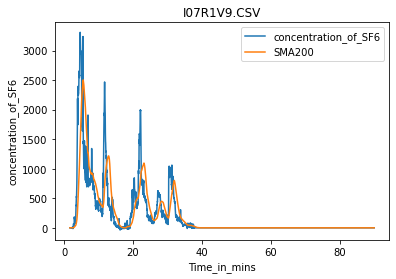

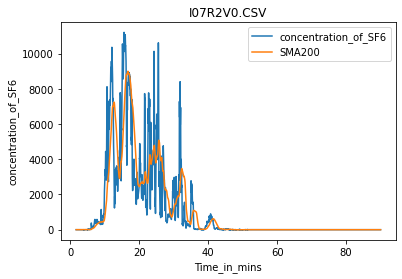

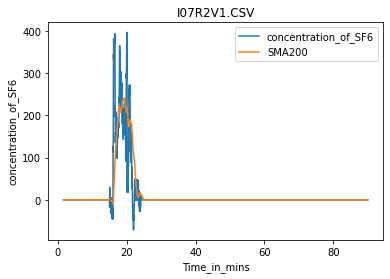

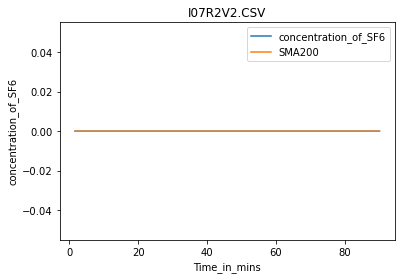

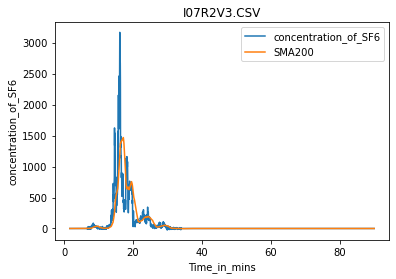

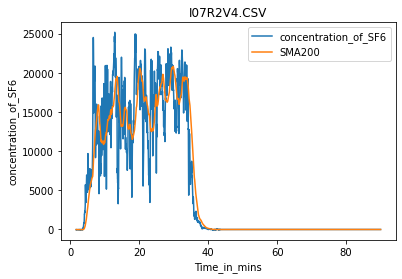

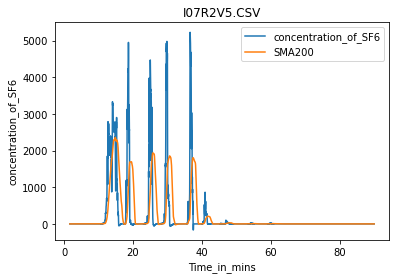

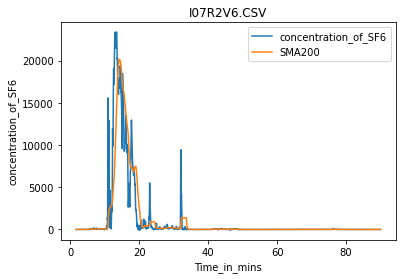

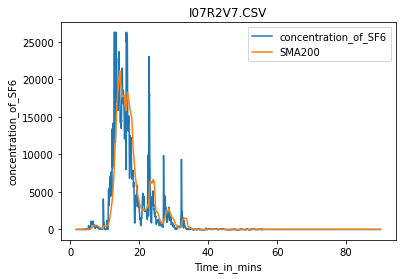

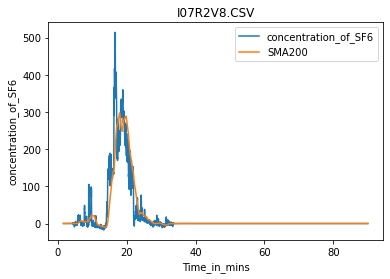

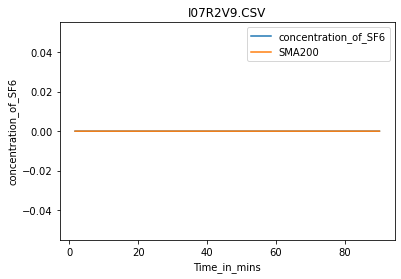

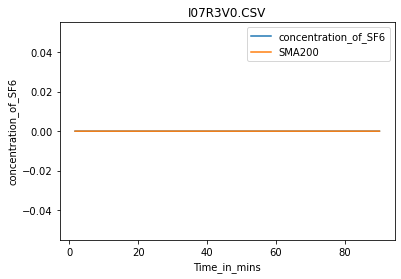

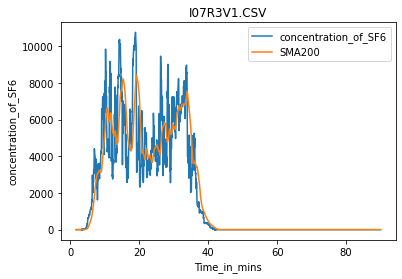

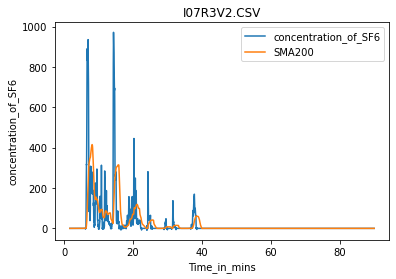

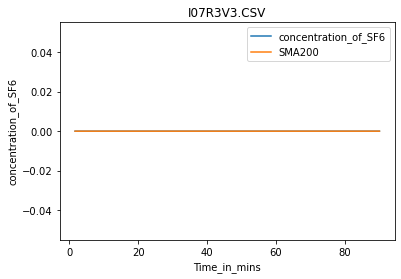

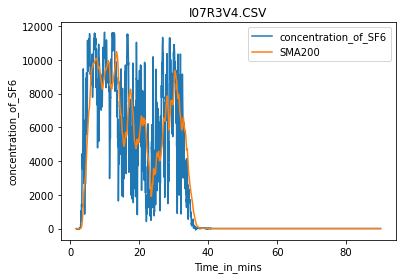

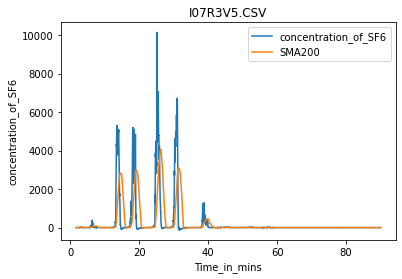

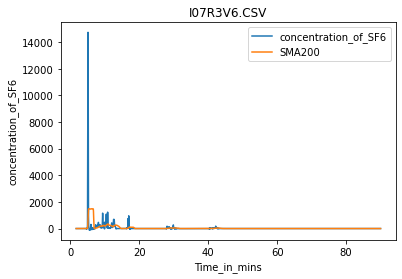

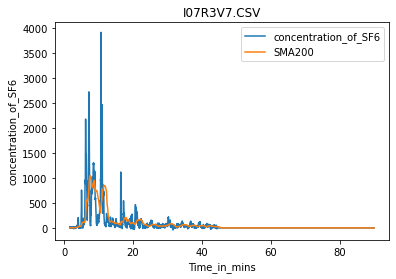

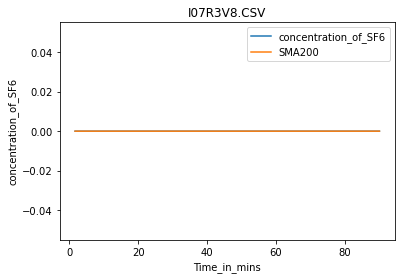

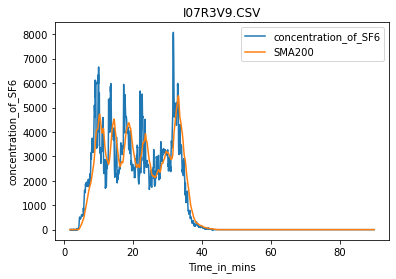

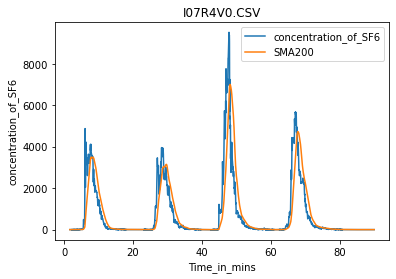

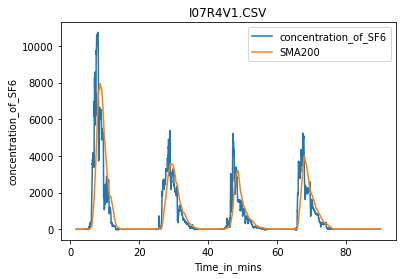

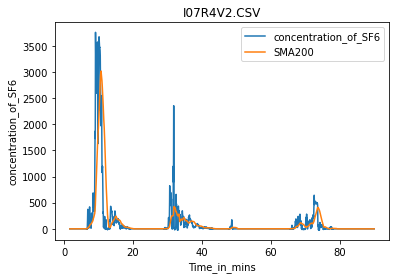

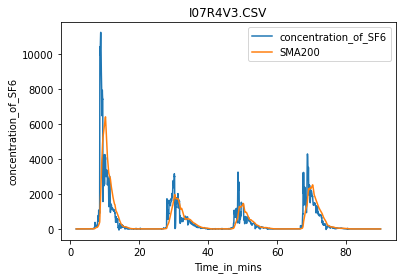

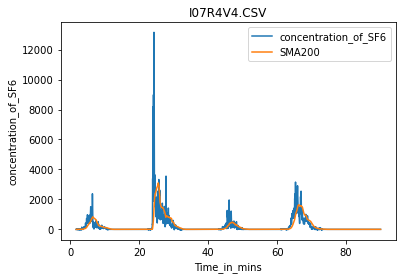

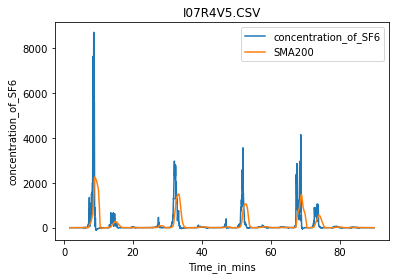

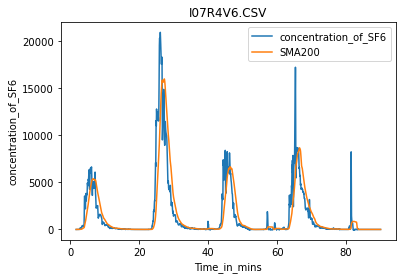

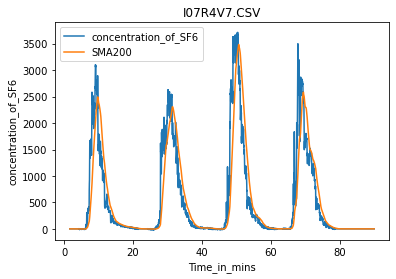

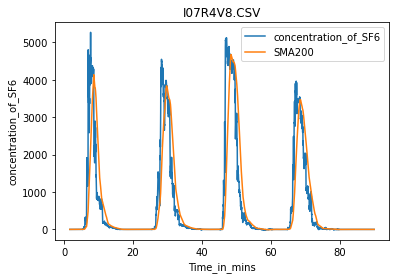

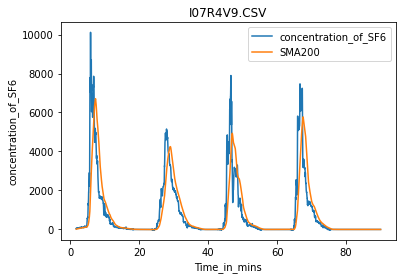

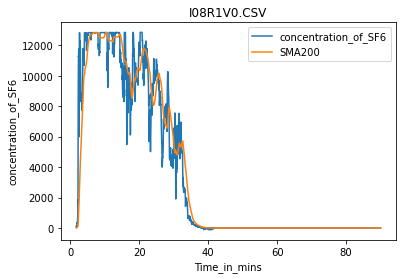

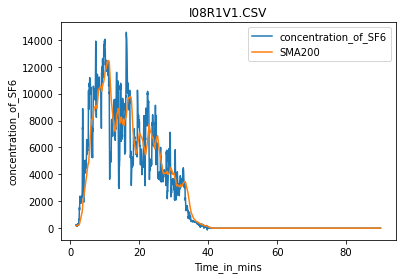

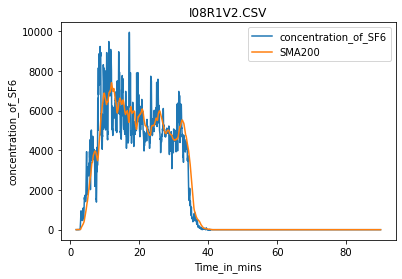

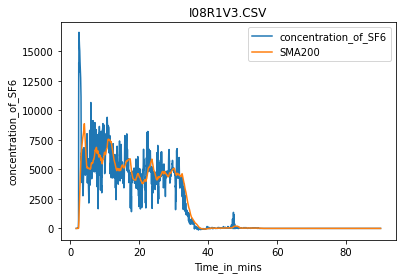

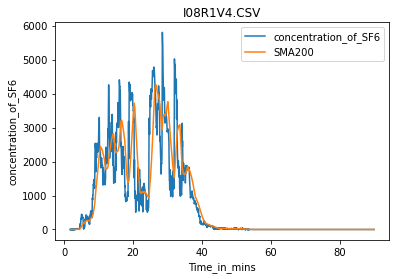

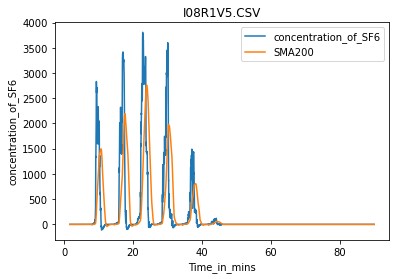

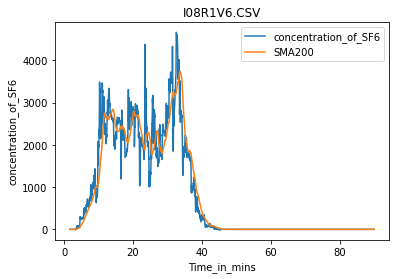

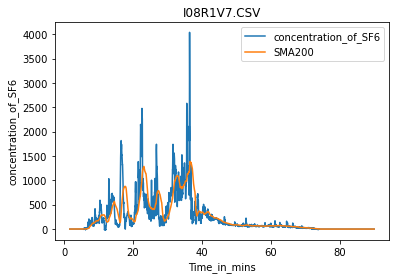

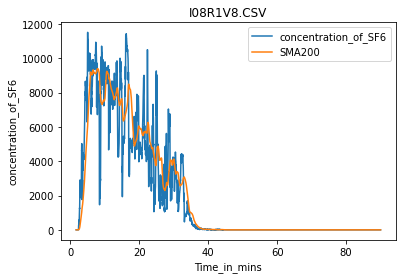

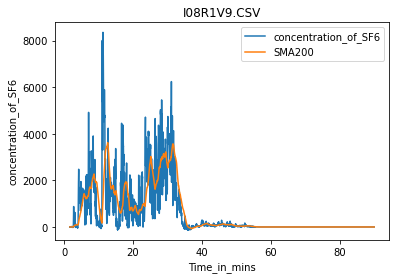

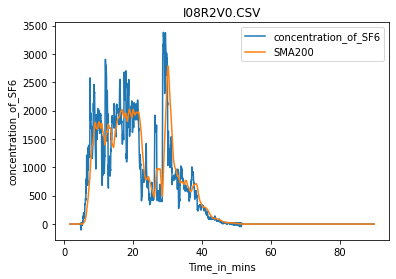

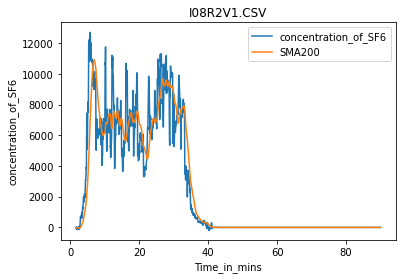

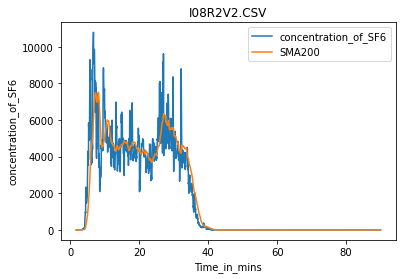

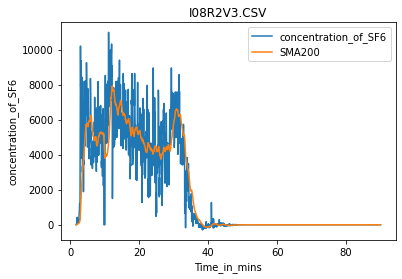

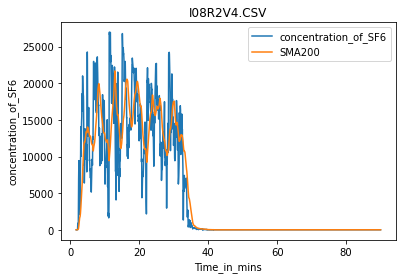

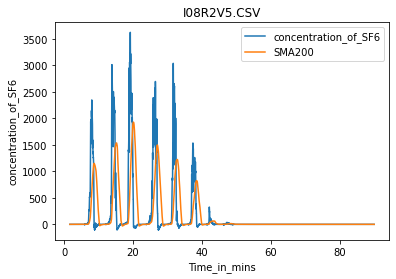

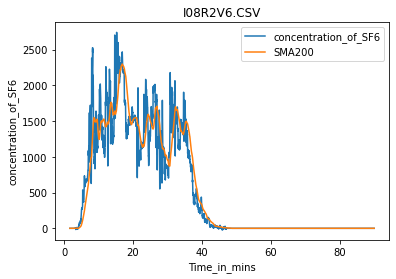

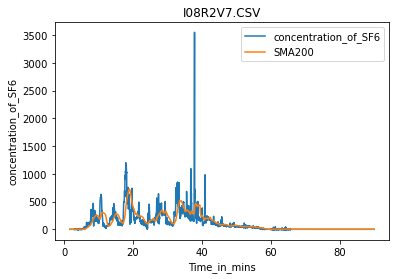

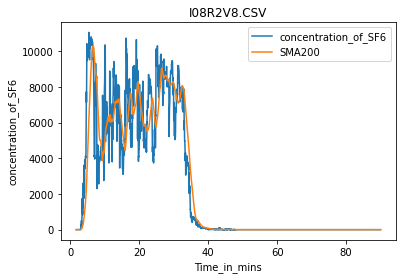

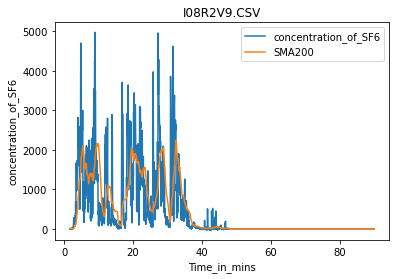

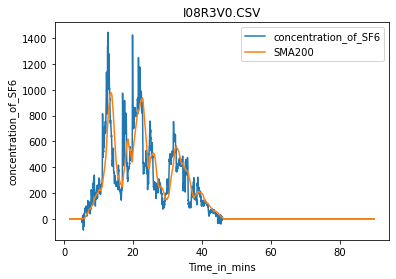

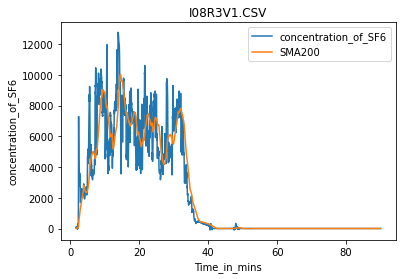

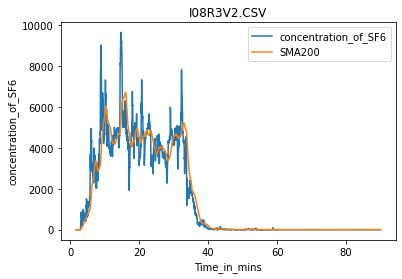

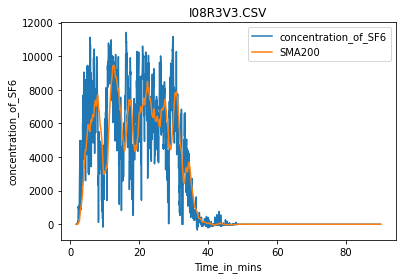

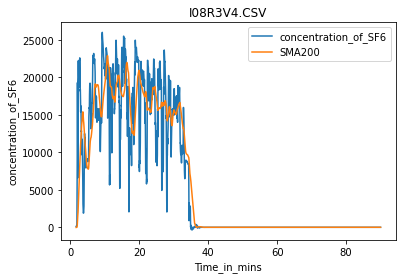

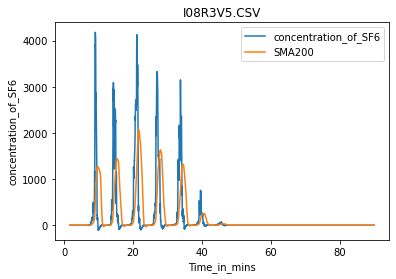

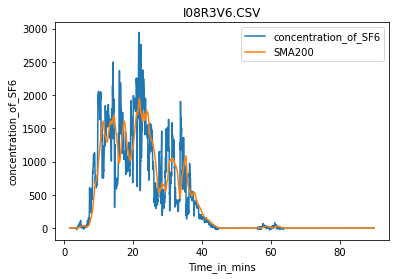

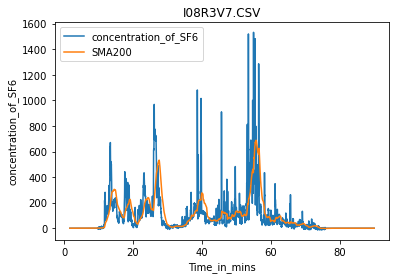

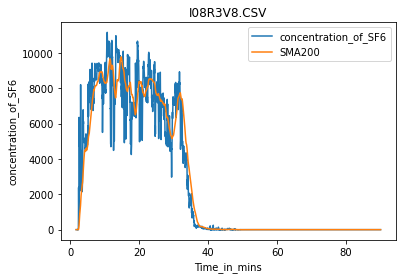

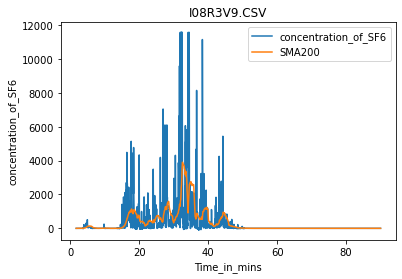

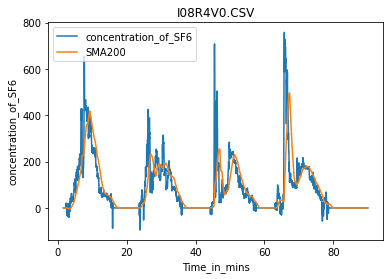

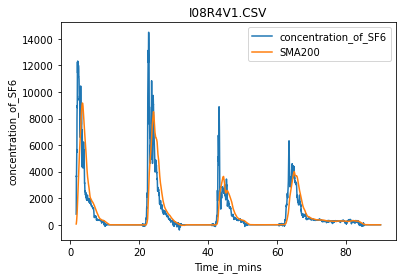

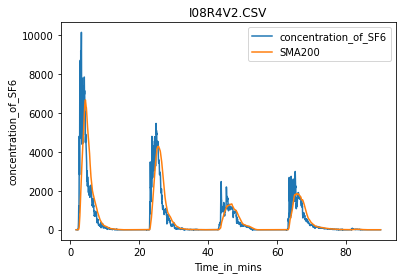

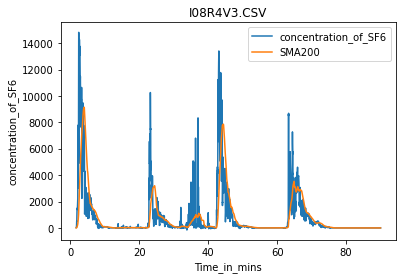

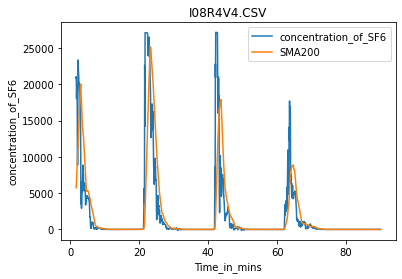

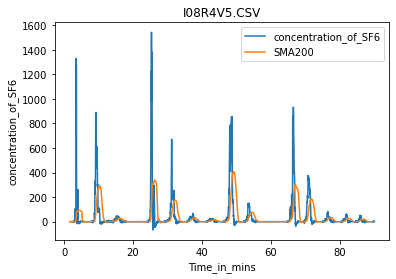

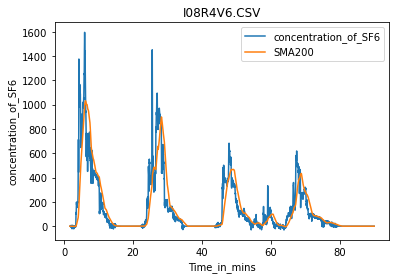

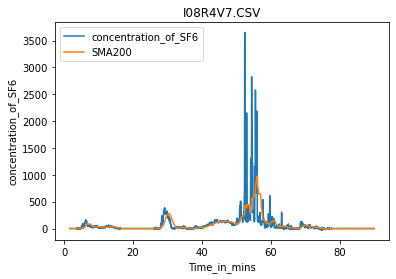

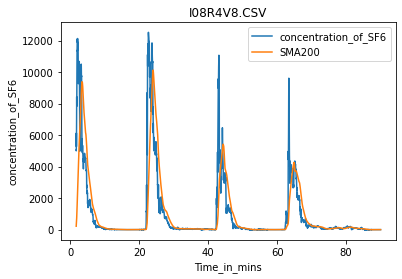

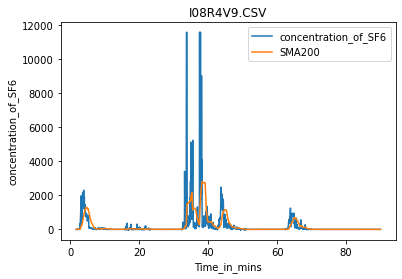

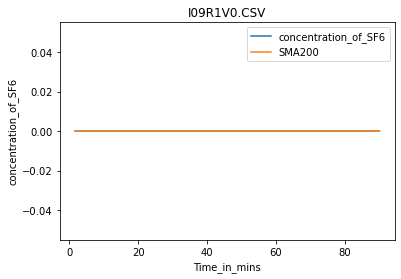

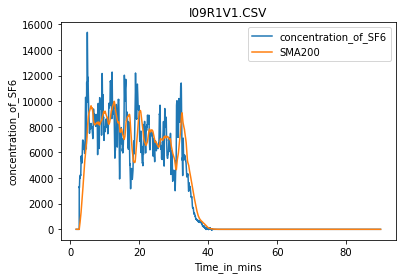

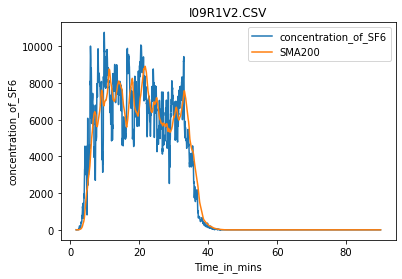

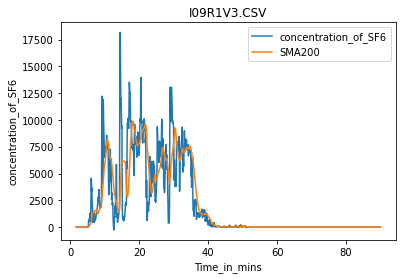

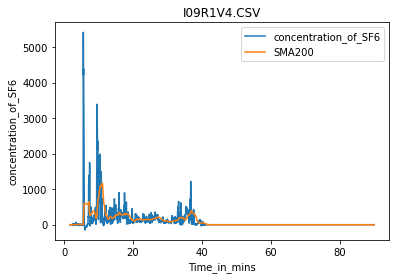

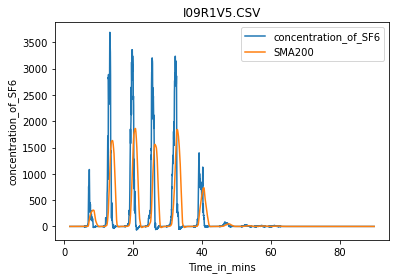

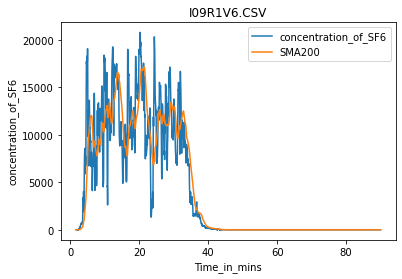

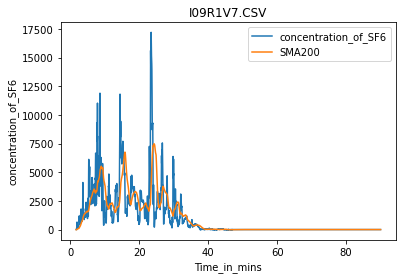

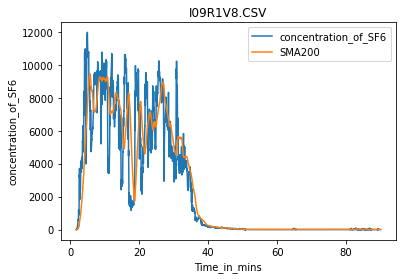

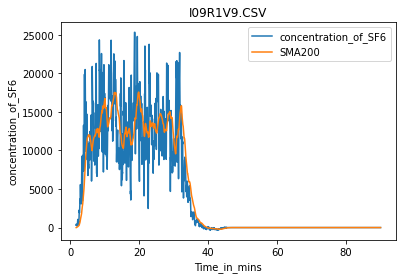

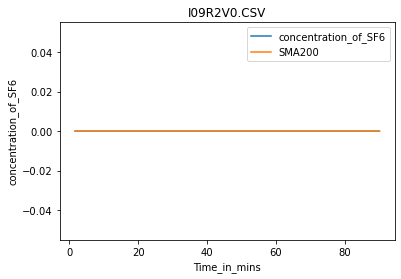

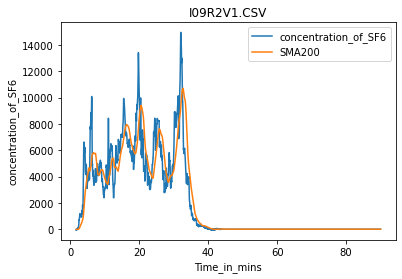

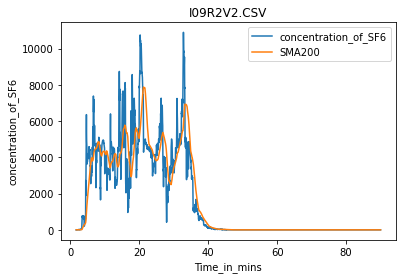

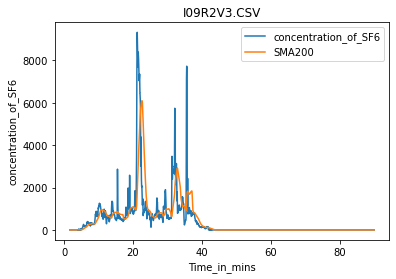

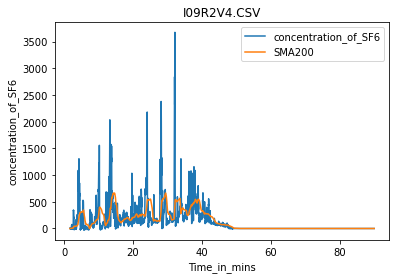

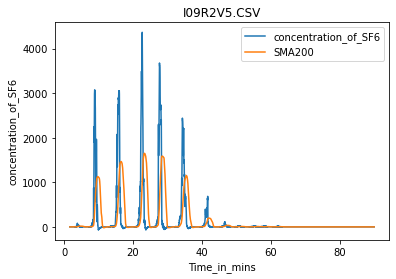

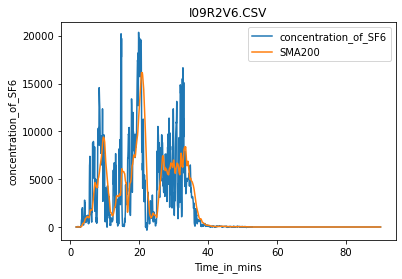

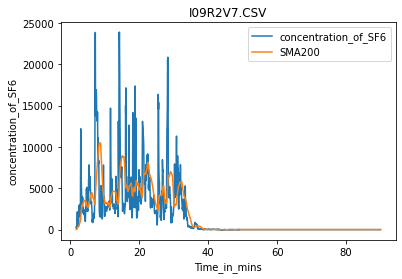

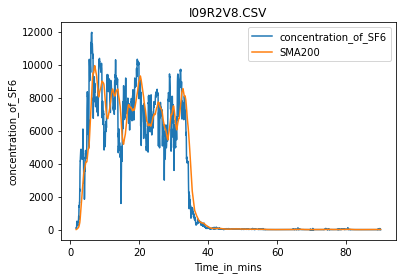

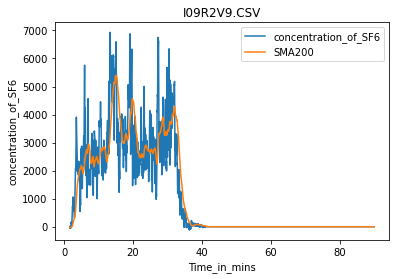

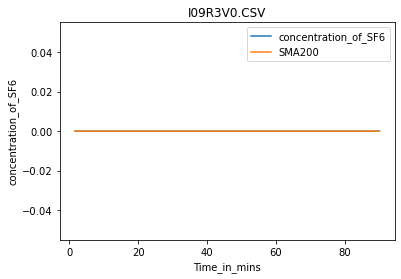

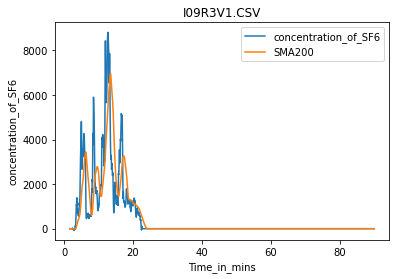

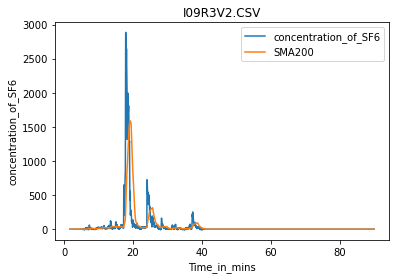

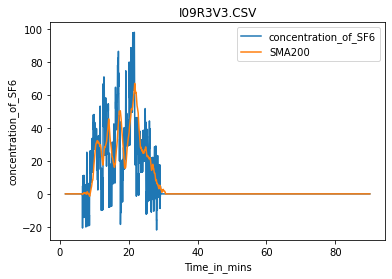

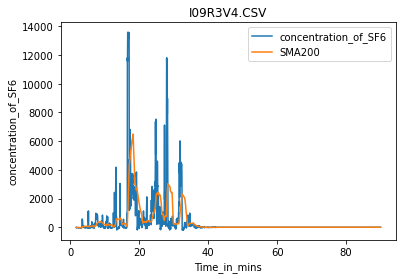

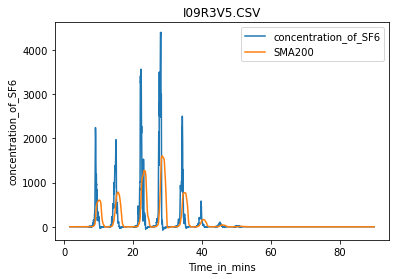

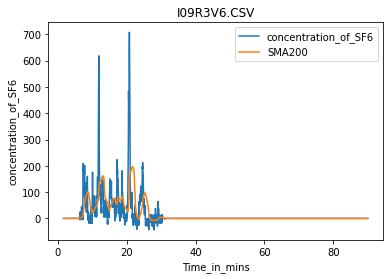

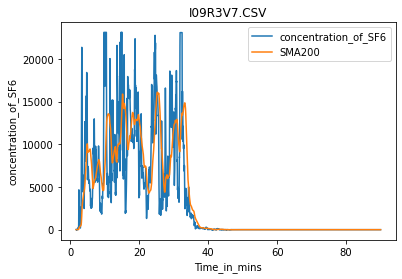

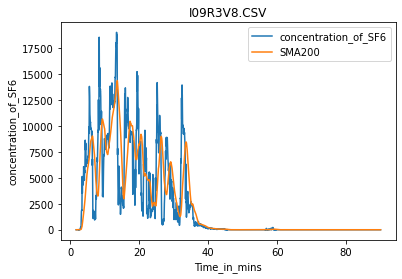

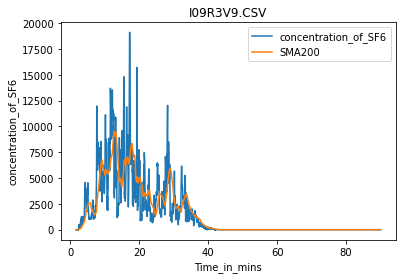

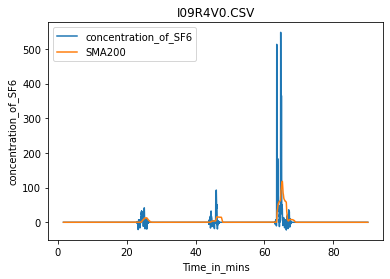

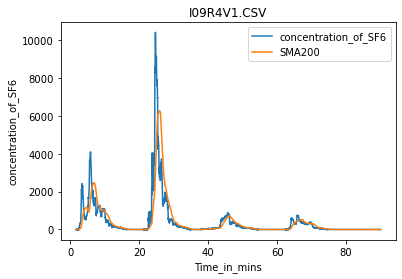

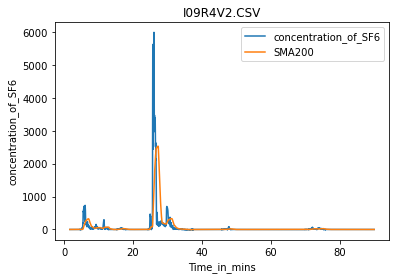

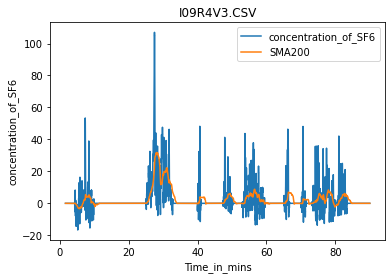

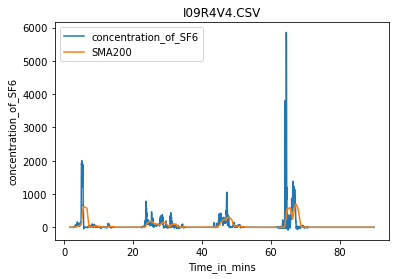

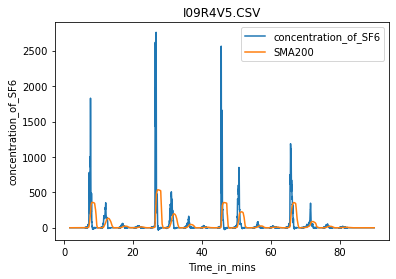

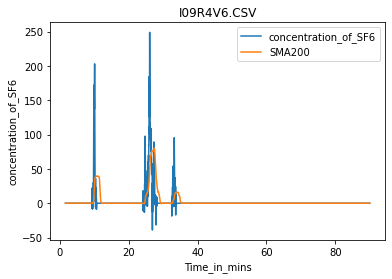

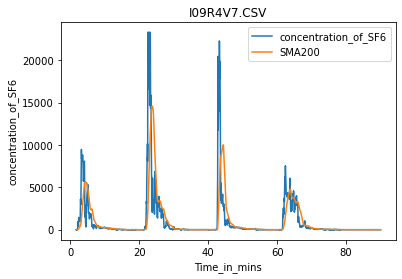

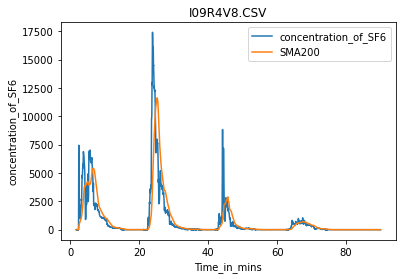

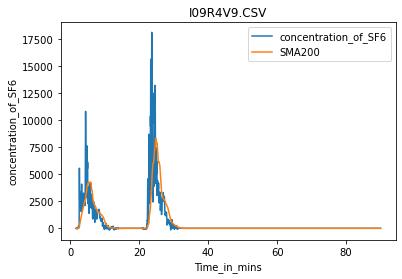

In [3]:
# read in the files
for xx in range(1,10):
    for y in range(1,5):
        for z in range(0,10):
            # Notice when z == 5, the file name is not capitalized
            if z == 5:
                # Check if file exist
                if os.path.exists('i0'+str(xx)+'r'+str(y)+'v'+str(z)+'.CSV'):
                    # Read the csv files and naming its columns
                    df = pd.read_csv('i0'+str(xx)+'r'+str(y)+'v'+str(z)+'.CSV', 
                     names=
                        ['Day_of_Year',
                        'UTC_Hours',
                        'UTC_Minutes',
                        'UTC_seconds',
                        'IOP_number',
                        'van_number',
                        'pass_number',
                        'hours_in_CDT_day_start',
                        'latitude',
                        'longitude', 
                        'altitude',
                        'number_of_satellites',
                        'hdop',
                        'concentration_of_SF6',
                        'QC_flag'])
                else:
                    continue
                    
            else:
                if os.path.exists('I0'+str(xx)+'R'+str(y)+'V'+str(z)+'.CSV'):
                    df = pd.read_csv('I0'+str(xx)+'R'+str(y)+'V'+str(z)+'.CSV', 
                     names=
                        ['Day_of_Year',
                        'UTC_Hours',
                        'UTC_Minutes',
                        'UTC_seconds',
                        'IOP_number',
                        'van_number',
                        'pass_number',
                        'hours_in_CDT_day_start',
                        'latitude',
                        'longitude', 
                        'altitude',
                        'number_of_satellites',
                        'hdop',
                        'concentration_of_SF6',
                        'QC_flag'])
                else:
                    continue
            # generate a new columns that record the experiment in mins    
            k = df['hours_in_CDT_day_start'][0]
            df['Time_in_mins'] = df['hours_in_CDT_day_start'].apply(lambda x: (x-k)*60)
            
            # clean the concentration_of_SF6 data and create a new dataframe to be plot
            df1 = df[['concentration_of_SF6','Time_in_mins']].replace(-999.0,0)
            
            # calculate the moving averge with a with of 200
            df1['SMA200'] = df1['concentration_of_SF6'].rolling(200).mean()
            df1.dropna(inplace = True)
            
            # plot the graph
            plt.plot(df1['Time_in_mins'],df1['concentration_of_SF6'],label = 'concentration_of_SF6')
            plt.plot(df1['Time_in_mins'],df1['SMA200'],label = 'SMA200')
            
            # label the graph
            plt.xlabel('Time_in_mins')
            plt.ylabel('concentration_of_SF6')
            plt.legend()
            plt.title('I0'+str(xx)+'R'+str(y)+'V'+str(z)+'.CSV')
            plt.show()

          